In [1]:
! pip install pandas

In [2]:
! pip install scikit-learn

In [3]:
! pip install matplotlib

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [5]:
file = "Datasets/DL.csv"
dl_df = pd.read_csv(file, sep=";")


In [6]:
dl_df = dl_df.drop(columns=["Id"])


In [7]:
dl_df

Class  Gender  Am1  Am2  Am3  Am4  Am5  Am6  Am7  Am8  ...  Es6  Es7  \
0        3       1    5    5    5    4    4    4    4    3  ...    5    5   
1        3       2    5    3    4    5    4    4    4    3  ...    4    4   
2        3       1    4    4    4    4    4    4    4    4  ...    4    5   
3        3       2    5    5    5    5    5    5    5    5  ...    4    4   
4        3       1    5    3    5    5    5    5    5    4  ...    5    3   
..     ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
380      2       1    4    5    5    5    3    3    5    3  ...    4    5   
381      2       1    5    5    3    3    4    3    4    4  ...    4    4   
382      3       2    5    5    5    5    5    5    5    5  ...    5    5   
383      3       1    5    5    4    5    4    5    5    4  ...    5    5   
384      3       2    4    3    2    5    2    3    3    2  ...    4    3   

     Es8  Es9  Es10  Es11  Es12  Es13  Es14  Es15  
0      5    5     4     5     5     4     5     5  
1      2    3     2     5     5     5     2     4  
2      4    4     2     4     5     2     4     5  
3      5    3     5     3     5     3     3     3  
4      3    3     5     3     5     1     4     5  
..   ...  ...   ...   ...   ...   ...   ...   ...  
380    3    3     5     5     4     4     5     1  
381    3    3     3     4     4     3     5     4  
382    5    5     5     5     2     5     5     1  
383    3    5     5     4     2     4     4     4  
384    3    4     5     4     4     4     4     3  

[385 rows x 52 columns]

In [8]:
dl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Class   385 non-null    int64
 1   Gender  385 non-null    int64
 2   Am1     385 non-null    int64
 3   Am2     385 non-null    int64
 4   Am3     385 non-null    int64
 5   Am4     385 non-null    int64
 6   Am5     385 non-null    int64
 7   Am6     385 non-null    int64
 8   Am7     385 non-null    int64
 9   Am8     385 non-null    int64
 10  Am9     385 non-null    int64
 11  Am10    385 non-null    int64
 12  Am11    385 non-null    int64
 13  Am12    385 non-null    int64
 14  Am13    385 non-null    int64
 15  Mp1     385 non-null    int64
 16  Mp2     385 non-null    int64
 17  Mp3     385 non-null    int64
 18  Mp4     385 non-null    int64
 19  Mp5     385 non-null    int64
 20  Mp6     385 non-null    int64
 21  Mp7     385 non-null    int64
 22  Mp8     385 non-null    int64
 23  Mp9     385 non

In [9]:
dl_df[['Am1', 'Am2', 'Am3', 'Am4', 'Am5', 'Am6', 'Am7', 'Am8', 'Am9', 'Am10', 'Am11', 'Am12', 'Am13']]

Am1  Am2  Am3  Am4  Am5  Am6  Am7  Am8  Am9  Am10  Am11  Am12  Am13
0      5    5    5    4    4    4    4    3    5     5     5     5     4
1      5    3    4    5    4    4    4    3    5     4     5     4     5
2      4    4    4    4    4    4    4    4    4     4     4     4     4
3      5    5    5    5    5    5    5    5    5     3     4     5     5
4      5    3    5    5    5    5    5    4    4     5     5     5     5
..   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...
380    4    5    5    5    3    3    5    3    4     5     4     5     4
381    5    5    3    3    4    3    4    4    4     3     4     5     4
382    5    5    5    5    5    5    5    5    5     5     5     5     5
383    5    5    4    5    4    5    5    4    5     5     5     5     4
384    4    3    2    5    2    3    3    2    1     3     5     2     3

[385 rows x 13 columns]

In [10]:
dl_df.describe()

Class      Gender         Am1         Am2         Am3         Am4  \
count  385.000000  385.000000  385.000000  385.000000  385.000000  385.000000   
mean     2.028571    1.462338    4.059740    4.153247    3.883117    4.067532   
std      0.823935    0.499228    0.742367    0.710704    0.912500    0.835795   
min      1.000000    1.000000    2.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    4.000000    4.000000    3.000000    4.000000   
50%      2.000000    1.000000    4.000000    4.000000    4.000000    4.000000   
75%      3.000000    2.000000    5.000000    5.000000    5.000000    5.000000   
max      3.000000    2.000000    5.000000    5.000000    5.000000    5.000000   

              Am5         Am6         Am7         Am8  ...         Es6  \
count  385.000000  385.000000  385.000000  385.000000  ...  385.000000   
mean     3.776623    3.992208    3.927273    3.703896  ...    4.012987   
std      0.830395    0.788882    0.793797    0.794257  ...    0.811594   
min      1.000000    1.000000    1.000000    1.000000  ...    1.000000   
25%      3.000000    4.000000    3.000000    3.000000  ...    3.000000   
50%      4.000000    4.000000    4.000000    4.000000  ...    4.000000   
75%      4.000000    5.000000    5.000000    4.000000  ...    5.000000   
max      5.000000    5.000000    5.000000    5.000000  ...    5.000000   

              Es7         Es8         Es9        Es10        Es11        Es12  \
count  385.000000  385.000000  385.000000  385.000000  385.000000  385.000000   
mean     3.981818    3.937662    3.815584    3.820779    3.820779    3.880519   
std      0.775391    0.829947    0.856815    0.881869    0.919457    0.913589   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    3.000000    3.000000    3.000000    3.000000   
50%      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000   
75%      5.000000    5.000000    4.000000    4.000000    4.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

             Es13        Es14        Es15  
count  385.000000  385.000000  385.000000  
mean     3.493506    3.610390    3.859740  
std      0.924541    0.834726    0.860635  
min      1.000000    1.000000    1.000000  
25%      3.000000    3.000000    3.000000  
50%      3.000000    4.000000    4.000000  
75%      4.000000    4.000000    4.000000  
max      5.000000    5.000000    5.000000  

[8 rows x 52 columns]

In [11]:
def assess_digital_literacy(row):
    Am_avg = row[['Am1', 'Am2', 'Am3', 'Am4', 'Am5', 'Am6', 'Am7', 'Am8', 'Am9', 'Am10', 'Am11', 'Am12', 'Am13']].mean()
    Mp_avg = row[['Mp1', 'Mp2', 'Mp3', 'Mp4', 'Mp5', 'Mp6', 'Mp7', 'Mp8', 'Mp9']].mean()
    Adm_avg = row[['Adm1', 'Adm2', 'Adm3', 'Adm4', 'Adm5', 'Adm6', 'Adm7', 'Adm8', 'Adm9', 'Adm10', 'Adm11', 'Adm12', 'Adm13']].mean()
    Es_avg = row[['Es1', 'Es2', 'Es3', 'Es4', 'Es5', 'Es6', 'Es7', 'Es8', 'Es9', 'Es10', 'Es11', 'Es12', 'Es13', 'Es14', 'Es15']].mean()

    averages = [Am_avg, Mp_avg, Adm_avg, Es_avg]

    count_above_threshold = sum(avg >= 4 for avg in averages)

    return '1' if count_above_threshold >= 3 else '0'


dl_df['Digital_Literacy'] = dl_df.apply(assess_digital_literacy, axis=1)



In [12]:
dl_df

Class  Gender  Am1  Am2  Am3  Am4  Am5  Am6  Am7  Am8  ...  Es7  Es8  \
0        3       1    5    5    5    4    4    4    4    3  ...    5    5   
1        3       2    5    3    4    5    4    4    4    3  ...    4    2   
2        3       1    4    4    4    4    4    4    4    4  ...    5    4   
3        3       2    5    5    5    5    5    5    5    5  ...    4    5   
4        3       1    5    3    5    5    5    5    5    4  ...    3    3   
..     ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
380      2       1    4    5    5    5    3    3    5    3  ...    5    3   
381      2       1    5    5    3    3    4    3    4    4  ...    4    3   
382      3       2    5    5    5    5    5    5    5    5  ...    5    5   
383      3       1    5    5    4    5    4    5    5    4  ...    5    3   
384      3       2    4    3    2    5    2    3    3    2  ...    3    3   

     Es9  Es10  Es11  Es12  Es13  Es14  Es15  Digital_Literacy  
0      5     4     5     5     4     5     5                 1  
1      3     2     5     5     5     2     4                 0  
2      4     2     4     5     2     4     5                 1  
3      3     5     3     5     3     3     3                 0  
4      3     5     3     5     1     4     5                 0  
..   ...   ...   ...   ...   ...   ...   ...               ...  
380    3     5     5     4     4     5     1                 0  
381    3     3     4     4     3     5     4                 0  
382    5     5     5     2     5     5     1                 1  
383    5     5     4     2     4     4     4                 1  
384    4     5     4     4     4     4     3                 0  

[385 rows x 53 columns]

In [13]:
cr = dl_df.corr()
f = -1
for i in cr["Digital_Literacy"]:
    f += 1
    if i >=0.5:
        print(cr.index[f],i)

Am8 0.5207550940158531
Mp2 0.5160810676622222
Mp3 0.5538449451200118
Mp6 0.53213499067985
Mp7 0.551436752114412
Adm1 0.5115768416256217
Adm2 0.5662015860322303
Adm3 0.5321750672146174
Adm4 0.5204781525173539
Adm5 0.5073171490983897
Adm6 0.5037534420342836
Adm7 0.5447486168552931
Adm11 0.543072944042428
Adm12 0.5171612662103333
Adm13 0.5128278936564936
Digital_Literacy 1.0


In [14]:
def count_mean(row):
    Am_avg = row[['Am1', 'Am2', 'Am3', 'Am4', 'Am5', 'Am6', 'Am7', 'Am8', 'Am9', 'Am10', 'Am11', 'Am12', 'Am13']].mean()
    Mp_avg = row[['Mp1', 'Mp2', 'Mp3', 'Mp4', 'Mp5', 'Mp6', 'Mp7', 'Mp8', 'Mp9']].mean()
    Adm_avg = row[['Adm1', 'Adm2', 'Adm3', 'Adm4', 'Adm5', 'Adm6', 'Adm7', 'Adm8', 'Adm9', 'Adm10', 'Adm11', 'Adm12', 'Adm13']].mean()
    Es_avg = row[['Es1', 'Es2', 'Es3', 'Es4', 'Es5', 'Es6', 'Es7', 'Es8', 'Es9', 'Es10', 'Es11', 'Es12', 'Es13', 'Es14', 'Es15']].mean()

    averages = Am_avg+ Mp_avg+ Adm_avg+ Es_avg

    return averages

In [15]:
dl_df['Mean_T'] = dl_df.apply(count_mean, axis=1)

C:\Users\ead\AppData\Local\Temp\ipykernel_13772\3695440651.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(dl_df["Adm2"], dl_df["Mean_T"], c="#8b0000",cmap="inferno", s=1)


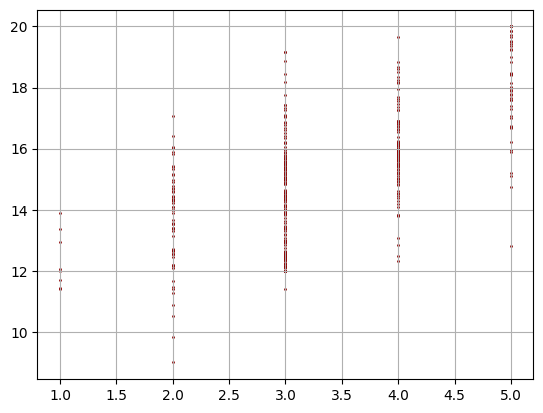

In [16]:
plt.scatter(dl_df["Adm2"], dl_df["Mean_T"], c="#8b0000",cmap="inferno", s=1)
plt.grid()


In [17]:
dl_df.iloc[0:,52:53]

Digital_Literacy
0                  1
1                  0
2                  1
3                  0
4                  0
..               ...
380                0
381                0
382                1
383                1
384                0

[385 rows x 1 columns]

In [18]:
dl_df["Digital_Literacy"].value_counts()

Digital_Literacy
0    264
1    121
Name: count, dtype: int64

In [19]:
am_vals = dl_df.iloc[0:,2:15]
mp_vals = dl_df.iloc[0:,15:24]
adm_vals = dl_df.iloc[0:,24:37]
es_vals = dl_df.iloc[0:,37:52]
literacy_vals = dl_df.iloc[0:,52:53]

In [20]:
dl_df.iloc[0:,2:52]

Am1  Am2  Am3  Am4  Am5  Am6  Am7  Am8  Am9  Am10  ...  Es6  Es7  Es8  \
0      5    5    5    4    4    4    4    3    5     5  ...    5    5    5   
1      5    3    4    5    4    4    4    3    5     4  ...    4    4    2   
2      4    4    4    4    4    4    4    4    4     4  ...    4    5    4   
3      5    5    5    5    5    5    5    5    5     3  ...    4    4    5   
4      5    3    5    5    5    5    5    4    4     5  ...    5    3    3   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...  ...   
380    4    5    5    5    3    3    5    3    4     5  ...    4    5    3   
381    5    5    3    3    4    3    4    4    4     3  ...    4    4    3   
382    5    5    5    5    5    5    5    5    5     5  ...    5    5    5   
383    5    5    4    5    4    5    5    4    5     5  ...    5    5    3   
384    4    3    2    5    2    3    3    2    1     3  ...    4    3    3   

     Es9  Es10  Es11  Es12  Es13  Es14  Es15  
0      5     4     5     5     4     5     5  
1      3     2     5     5     5     2     4  
2      4     2     4     5     2     4     5  
3      3     5     3     5     3     3     3  
4      3     5     3     5     1     4     5  
..   ...   ...   ...   ...   ...   ...   ...  
380    3     5     5     4     4     5     1  
381    3     3     4     4     3     5     4  
382    5     5     5     2     5     5     1  
383    5     5     4     2     4     4     4  
384    4     5     4     4     4     4     3  

[385 rows x 50 columns]

In [21]:
dl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 54 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Class             385 non-null    int64  
 1   Gender            385 non-null    int64  
 2   Am1               385 non-null    int64  
 3   Am2               385 non-null    int64  
 4   Am3               385 non-null    int64  
 5   Am4               385 non-null    int64  
 6   Am5               385 non-null    int64  
 7   Am6               385 non-null    int64  
 8   Am7               385 non-null    int64  
 9   Am8               385 non-null    int64  
 10  Am9               385 non-null    int64  
 11  Am10              385 non-null    int64  
 12  Am11              385 non-null    int64  
 13  Am12              385 non-null    int64  
 14  Am13              385 non-null    int64  
 15  Mp1               385 non-null    int64  
 16  Mp2               385 non-null    int64  
 1

In [22]:
train_x = dl_df.iloc[0:,2:52].values

train_y = dl_df.iloc[0:,52:53].values

model = LinearSVC()

In [23]:

X_train, X_test, y_train, y_test = train_test_split(train_x,train_y, test_size=0.3, random_state=45)

In [24]:
model.fit(X_train,y_train)

c:\Users\ead\Documents\Artur\anacondabank_m\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC()

In [25]:
pred = model.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[60 16]
 [10 30]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        76
           1       0.65      0.75      0.70        40

    accuracy                           0.78       116
   macro avg       0.75      0.77      0.76       116
weighted avg       0.79      0.78      0.78       116



In [26]:
model.predict([[5,5,3,3,2,5,3,3,5,5,4,5,5,2,5,4,4,4,3,5,4,2,1,2,5,5,5,4,4,3,2,4,4,5,5,5,1,5,5,5,4,2,5,4,4,5,1,3,4,5]])

array(['0'], dtype=object)

In [27]:
model.predict([[5,5,5,4,3,2,5,5,5,5,3,5,5,3,5,3,4,3,3,5,4,3,4,2,5,4,4,3,1,5,4,5,5,1,5,5,4,5,5,5,5,5,1,5,5,1,5,5,5,5]])

array(['0'], dtype=object)

In [28]:
! pip install pandas statsmodels

In [29]:
coefficients = model.coef_[0]

feature_names = dl_df.columns[2:52]  

coefficient_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

print(f"Number of Features: {len(feature_names)}, Number of Coefficients: {len(coefficients)}")

coefficient_df['Odds Ratio'] = np.exp(coefficients)
coefficient_df = coefficient_df.sort_values(by='Odds Ratio', ascending=False)

coefficient_df

Number of Features: 50, Number of Coefficients: 50


Feature  Coefficient  Odds Ratio
29    Adm8     0.305471    1.357264
23    Adm2     0.247977    1.281430
7      Am8     0.221233    1.247614
22    Adm1     0.213278    1.237728
14     Mp2     0.212659    1.236963
28    Adm7     0.208536    1.231873
27    Adm6     0.204732    1.227196
3      Am4     0.203993    1.226290
11    Am12     0.201693    1.223472
17     Mp5     0.196108    1.216658
18     Mp6     0.195121    1.215458
43     Es9     0.192001    1.211672
45    Es11     0.170001    1.185306
4      Am5     0.159259    1.172642
32   Adm11     0.153474    1.165878
40     Es6     0.140811    1.151208
6      Am7     0.137898    1.147859
31   Adm10     0.123276    1.131196
25    Adm4     0.109685    1.115926
49    Es15     0.102885    1.108364
21     Mp9     0.095383    1.100080
47    Es13     0.089061    1.093148
33   Adm12     0.087169    1.091081
44    Es10     0.059067    1.060846
15     Mp3     0.052982    1.054410
46    Es12     0.049033    1.050255
48    Es14     0.036463    1.037136
8      Am9     0.033455    1.034021
1      Am2     0.026073    1.026416
13     Mp1     0.007854    1.007885
30    Adm9     0.004354    1.004363
36     Es2    -0.017409    0.982741
39     Es5    -0.036603    0.964058
41     Es7    -0.056867    0.944720
2      Am3    -0.057886    0.943758
24    Adm3    -0.060376    0.941411
10    Am11    -0.064707    0.937342
38     Es4    -0.065216    0.936865
42     Es8    -0.088009    0.915752
20     Mp8    -0.092266    0.911863
16     Mp4    -0.094014    0.910270
34   Adm13    -0.095263    0.909133
19     Mp7    -0.136365    0.872524
37     Es3    -0.139434    0.869850
5      Am6    -0.182289    0.833361
0      Am1    -0.184270    0.831712
12    Am13    -0.245073    0.782647
35     Es1    -0.273713    0.760550
9     Am10    -0.283693    0.752997
26    Adm5    -0.391008    0.676375

In [30]:
import matplotlib.pyplot as plt

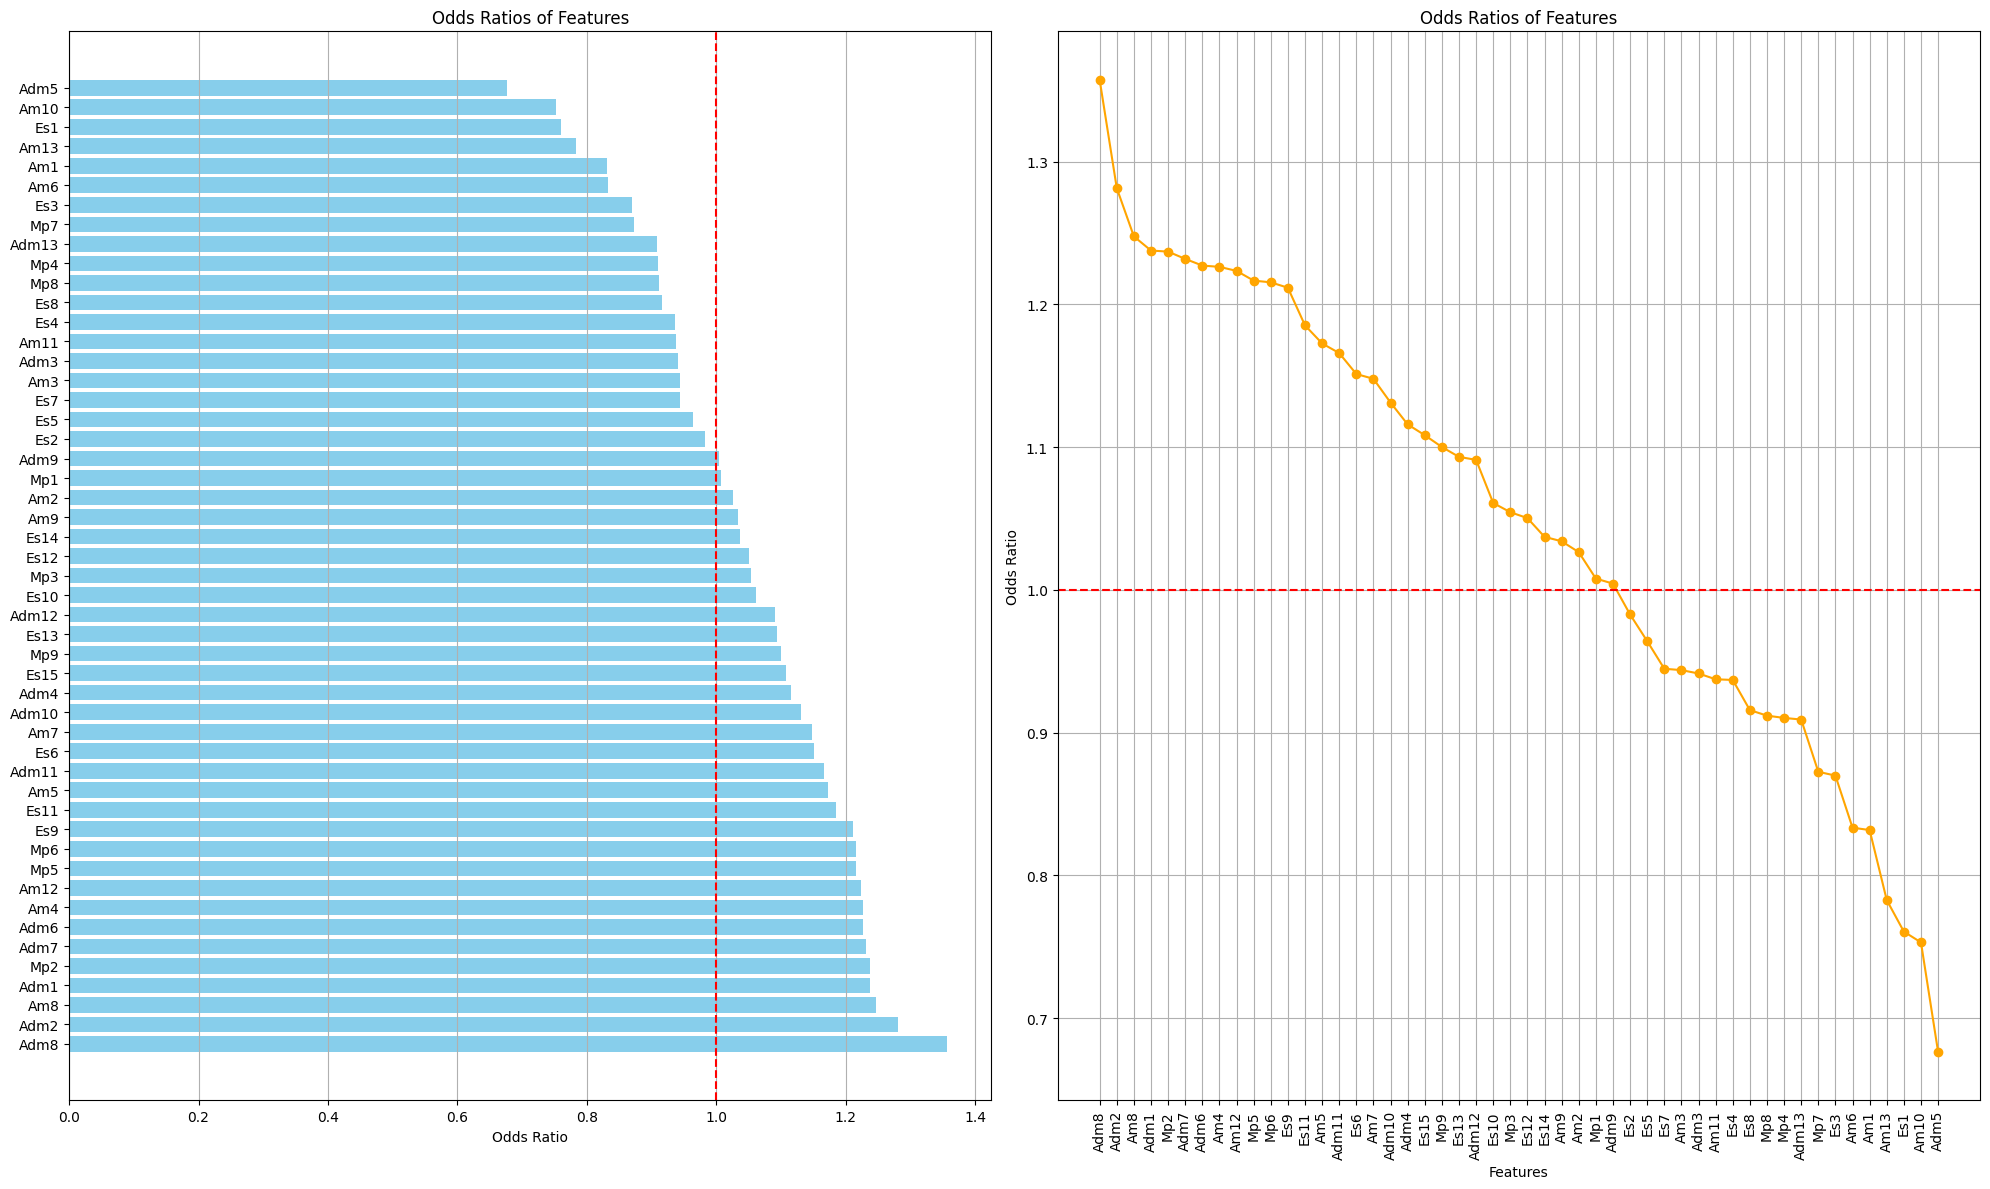

In [31]:
# Plotting the Odds Ratios
plt.figure(figsize=(20, 12))

# Bar Graph
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.barh(coefficient_df['Feature'], coefficient_df['Odds Ratio'], color='skyblue')
plt.xlabel('Odds Ratio')
plt.title('Odds Ratios of Features')
plt.axvline(x=1, color='red', linestyle='--')  # Line at odds ratio = 1
plt.grid(axis='x')

# Line Graph
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(coefficient_df['Feature'], coefficient_df['Odds Ratio'], marker='o', color='orange')
plt.xlabel('Features')
plt.ylabel('Odds Ratio')
plt.title('Odds Ratios of Features')
plt.axhline(y=1, color='red', linestyle='--')  # Line at odds ratio = 1
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()

In [32]:
! pip install imblearn

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
from sklearn.calibration import CalibratedClassifierCV
from imblearn.over_sampling import SMOTE
import numpy as np

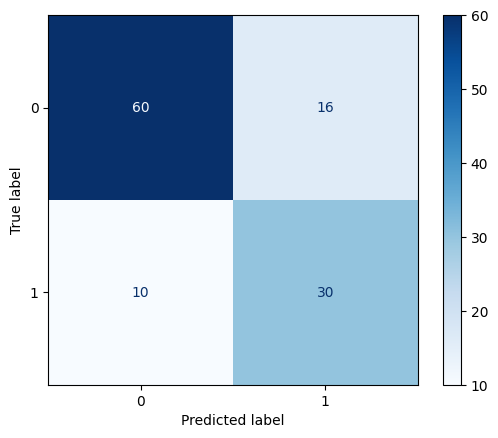

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test,pred,cmap="Blues")

In [43]:
train_y

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,

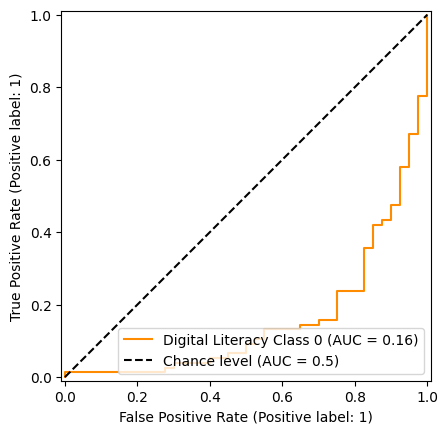

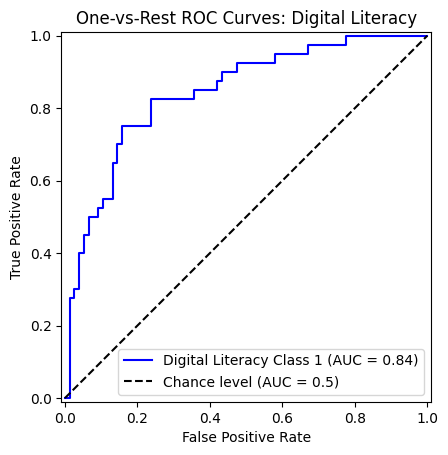

[[46 30]
 [ 6 34]]
              precision    recall  f1-score   support

           0       0.88      0.61      0.72        76
           1       0.53      0.85      0.65        40

    accuracy                           0.69       116
   macro avg       0.71      0.73      0.69       116
weighted avg       0.76      0.69      0.70       116



NameError: name 'prob_previsao' is not defined

In [36]:
train_x = dl_df.iloc[:, 2:52].values
train_y = dl_df['Digital_Literacy'].values.astype(int)  # Ensure this is a binary target variable

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=45)
smote = SMOTE(random_state=45)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# Fit the model
model = LinearSVC(class_weight="balanced")
model.fit(X_resampled, y_resampled)

# Get decision scores for the ROC curve
y_score = model.decision_function(X_test)

# If y_test is not in a one-hot format, you can directly use it.
class_id = 1  # Assuming you are interested in Class 1
class_of_interest = "Digital Literacy Class 1"

isplay_0 = RocCurveDisplay.from_predictions(
    y_test == 0,  # True labels for Class 0
    y_score,      # Decision function scores
    name="Digital Literacy Class 0",
    color="darkorange",
    plot_chance_level=True,
)

# ROC Curve for Class 1
display_1 = RocCurveDisplay.from_predictions(
    y_test == 1,  # True labels for Class 1
    y_score,      # Decision function scores
    name="Digital Literacy Class 1",
    color="blue",
    plot_chance_level=True,
)

# Set axes labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC Curves: Digital Literacy")

# Show the plot
plt.show()
pred = model.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
tfp,tvp,limite = roc_curve(y_test,prob_previsao)
print("roc_auc",roc_auc_score(y_test,prob_previsao))
plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

<Figure size 800x800 with 0 Axes>

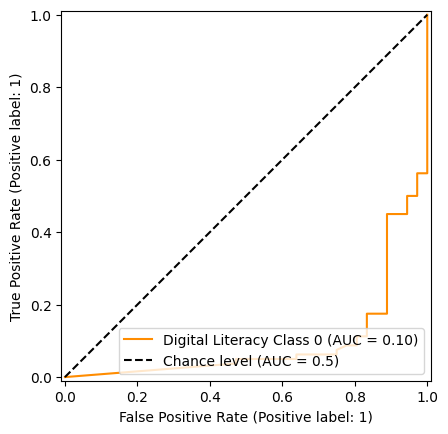

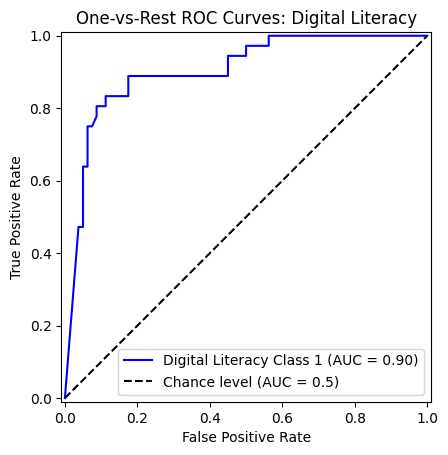

[[33 47]
 [ 0 36]]
              precision    recall  f1-score   support

           0       1.00      0.41      0.58        80
           1       0.43      1.00      0.61        36

    accuracy                           0.59       116
   macro avg       0.72      0.71      0.59       116
weighted avg       0.82      0.59      0.59       116

roc_auc 0.978125


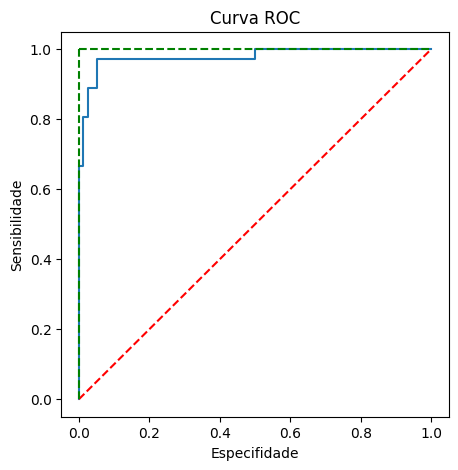

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming dl_df is your DataFrame with the relevant data
train_x = dl_df.iloc[:, 2:52].values
train_y = dl_df['Digital_Literacy'].values.astype(int)  # Ensure this is a binary target variable

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=45, stratify=train_y)

# Apply SMOTE
smote = SMOTE(random_state=45)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Fit the Random Forest model
model = RandomForestClassifier(class_weight={0: 1, 1: 600}, random_state=45, n_estimators=100, max_depth=5)
model.fit(X_resampled, y_resampled)

# Get predicted probabilities for the ROC curve
y_score = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Plot ROC curves for both classes
plt.figure(figsize=(8, 8))

# ROC Curve for Class 0
display_0 = RocCurveDisplay.from_predictions(
    y_test == 0,  # True labels for Class 0
    y_score,      # Predicted probabilities for the positive class
    name="Digital Literacy Class 0",
    color="darkorange",
    plot_chance_level=True,
)

# ROC Curve for Class 1
display_1 = RocCurveDisplay.from_predictions(
    y_test == 1,  # True labels for Class 1
    y_score,      # Predicted probabilities for the positive class
    name="Digital Literacy Class 1",
    color="blue",
    plot_chance_level=True,
)

# Set axes labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC Curves: Digital Literacy")

# Show the plot
plt.legend(loc="best")
plt.show()
pred = model.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("roc_auc",roc_auc_score(y_test,prob_previsao))
tfp,tvp,limite = roc_curve(y_test,prob_previsao)
plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()


In [37]:
! pip install xgboost

c:\Users\ead\Documents\Artur\anacondabank_m\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:14:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.99      0.95      0.97        80
           1       0.90      0.97      0.93        36

    accuracy                           0.96       116
   macro avg       0.94      0.96      0.95       116
weighted avg       0.96      0.96      0.96       116

[[76  4]
 [ 1 35]]


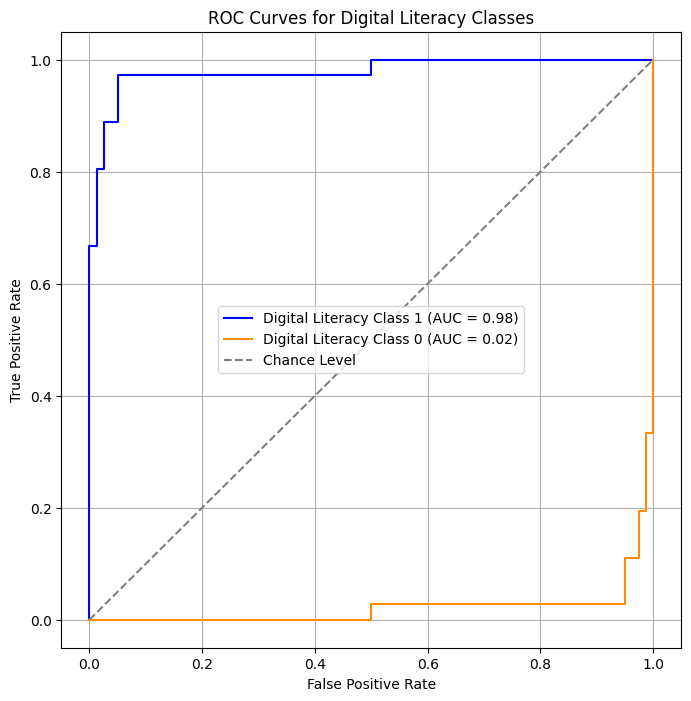

roc_auc 0.978125


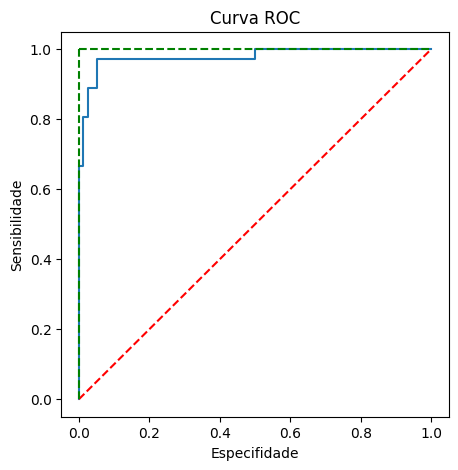

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming dl_df is your DataFrame with the relevant data
train_x = dl_df.iloc[:, 2:52].values
train_y = dl_df['Digital_Literacy'].values.astype(int)  # Ensure this is a binary target variable

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=45, stratify=train_y)

# Apply SMOTE
smote = SMOTE(random_state=45)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Fit the XGBoost model
model = xgb.XGBClassifier(
    scale_pos_weight=2,  # Adjust for class imbalance
    random_state=45,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_resampled, y_resampled)

# Get predicted probabilities for the ROC curve
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
fpr_1, tpr_1, _ = roc_curve(y_test, y_prob)  # For Class 1
roc_auc_1 = auc(fpr_1, tpr_1)

fpr_0, tpr_0, _ = roc_curve(y_test, 1 - y_prob)  # For Class 0 (inverting probabilities)
roc_auc_0 = auc(fpr_0, tpr_0)

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_1, tpr_1, color='blue', label=f'Digital Literacy Class 1 (AUC = {roc_auc_1:.2f})')
plt.plot(fpr_0, tpr_0, color='darkorange', label=f'Digital Literacy Class 0 (AUC = {roc_auc_0:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance Level')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Digital Literacy Classes')
plt.legend(loc='best')
plt.grid()
plt.show()
from sklearn.metrics import roc_curve,roc_auc_score
prob_previsao = model.predict_proba(X_test)[:,1]

tfp,tvp,limite = roc_curve(y_test,prob_previsao)
print("roc_auc",roc_auc_score(y_test,prob_previsao))
plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from itertools import cycle

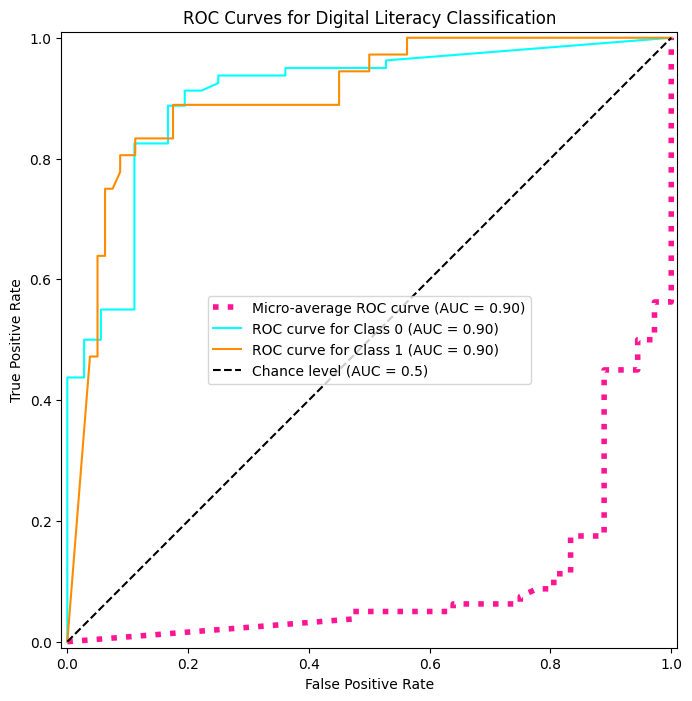

In [41]:
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=0)
roc_auc = roc_auc_score(y_test, y_score)

# Calculate micro-average ROC curve
fpr_micro = fpr
tpr_micro = tpr
roc_auc_micro = roc_auc

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Micro-average ROC curve
ax.plot(
    fpr_micro,
    tpr_micro,
    label=f"Micro-average ROC curve (AUC = {roc_auc_micro:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

# Individual ROC curves for each class
colors = cycle(["aqua", "darkorange"])
for class_id, color in zip([0, 1], colors):
    if class_id == 1:  # For positive class
        fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=class_id)
    else:  # For negative class
        fpr_neg, tpr_neg, _ = roc_curve(y_test, -y_score, pos_label=class_id)
        # Create the same threshold points as for the positive class
        fpr, tpr = fpr_neg, tpr_neg
        
    RocCurveDisplay.from_predictions(
        y_test == class_id,
        y_score if class_id == 1 else -y_score,  # Ensure positive class scores
        name=f"ROC curve for Class {class_id}",
        color=color,
        ax=ax,
        plot_chance_level=(class_id == 1),  # Adjust based on your class setup
    )

# Set axes labels and title
_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC Curves for Digital Literacy Classification"
)

plt.legend(loc="best")
plt.show()

Histograma de colunas importantes.
boxplot de colunas importante.

In [103]:
vals = []
for i in dl_df.drop(columns=["Digital_Literacy", "Class", "Gender", "Mean_T"]).columns:
    vals.append(i)

{'whiskers': [<matplotlib.lines.Line2D at 0x197821862a0>,
 'caps': [<matplotlib.lines.Line2D at 0x19782186a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1978212bdd0>,
 'medians': [<matplotlib.lines.Line2D at 0x19782187200>,
 'fliers': [<matplotlib.lines.Line2D at 0x197821875f0>,
 'means': []}

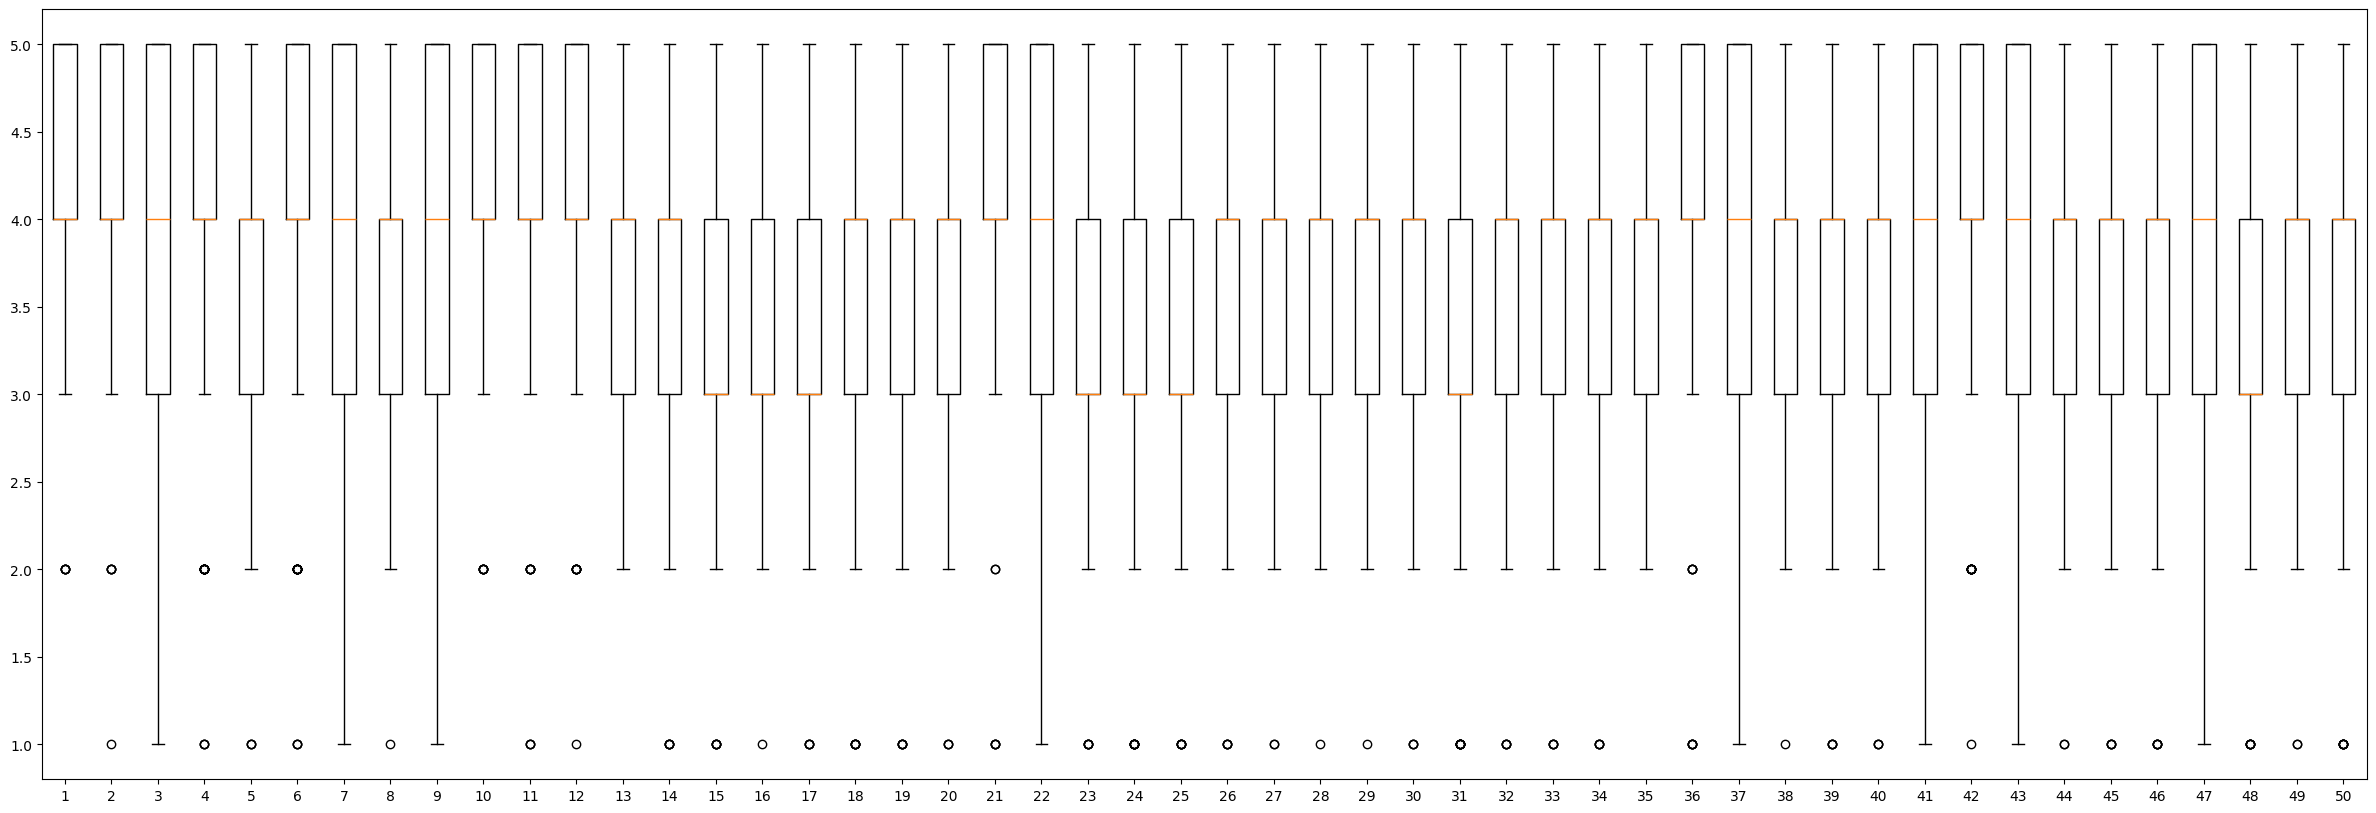

In [107]:
plt.figure(figsize=(30,10))
plt.boxplot(dl_df.drop(columns=["Digital_Literacy", "Class", "Gender", "Mean_T"]))



In [50]:
dl_df.columns

Index(['Class', 'Gender', 'Am1', 'Am2', 'Am3', 'Am4', 'Am5', 'Am6', 'Am7',
       'Am8', 'Am9', 'Am10', 'Am11', 'Am12', 'Am13', 'Mp1', 'Mp2', 'Mp3',
       'Mp4', 'Mp5', 'Mp6', 'Mp7', 'Mp8', 'Mp9', 'Adm1', 'Adm2', 'Adm3',
       'Adm4', 'Adm5', 'Adm6', 'Adm7', 'Adm8', 'Adm9', 'Adm10', 'Adm11',
       'Adm12', 'Adm13', 'Es1', 'Es2', 'Es3', 'Es4', 'Es5', 'Es6', 'Es7',
       'Es8', 'Es9', 'Es10', 'Es11', 'Es12', 'Es13', 'Es14', 'Es15',
       'Digital_Literacy', 'Mean_T'],
      dtype='object')

(array([[  0.,   0.,   5.,   0.,   0.,  80.,   0., 187.,   0., 113.],
        [  1.,   0.,   4.,   0.,   0.,  54.,   0., 202.,   0., 124.],
        [  3.,   0.,  25.,   0.,   0.,  92.,   0., 159.,   0., 106.],
        [  3.,   0.,  12.,   0.,   0.,  68.,   0., 175.,   0., 127.],
        [  3.,   0.,  19.,   0.,   0., 110.,   0., 182.,   0.,  71.],
        [  3.,   0.,  12.,   0.,   0.,  67.,   0., 206.,   0.,  97.],
        [  1.,   0.,   8.,   0.,   0., 106.,   0., 173.,   0.,  97.],
        [  1.,   0.,  13.,   0.,   0., 150.,   0., 156.,   0.,  65.],
        [  2.,   0.,  11.,   0.,   0.,  95.,   0., 177.,   0., 100.],
        [  0.,   0.,   6.,   0.,   0.,  75.,   0., 186.,   0., 118.],
        [  3.,   0.,   6.,   0.,   0.,  81.,   0., 177.,   0., 118.],
        [  1.,   0.,   7.,   0.,   0.,  60.,   0., 170.,   0., 147.],
        [  0.,   0.,   9.,   0.,   0., 109.,   0., 177.,   0.,  90.],
        [  5.,   0.,  20.,   0.,   0., 131.,   0., 164.,   0.,  65.],
        [  5.,   0.,

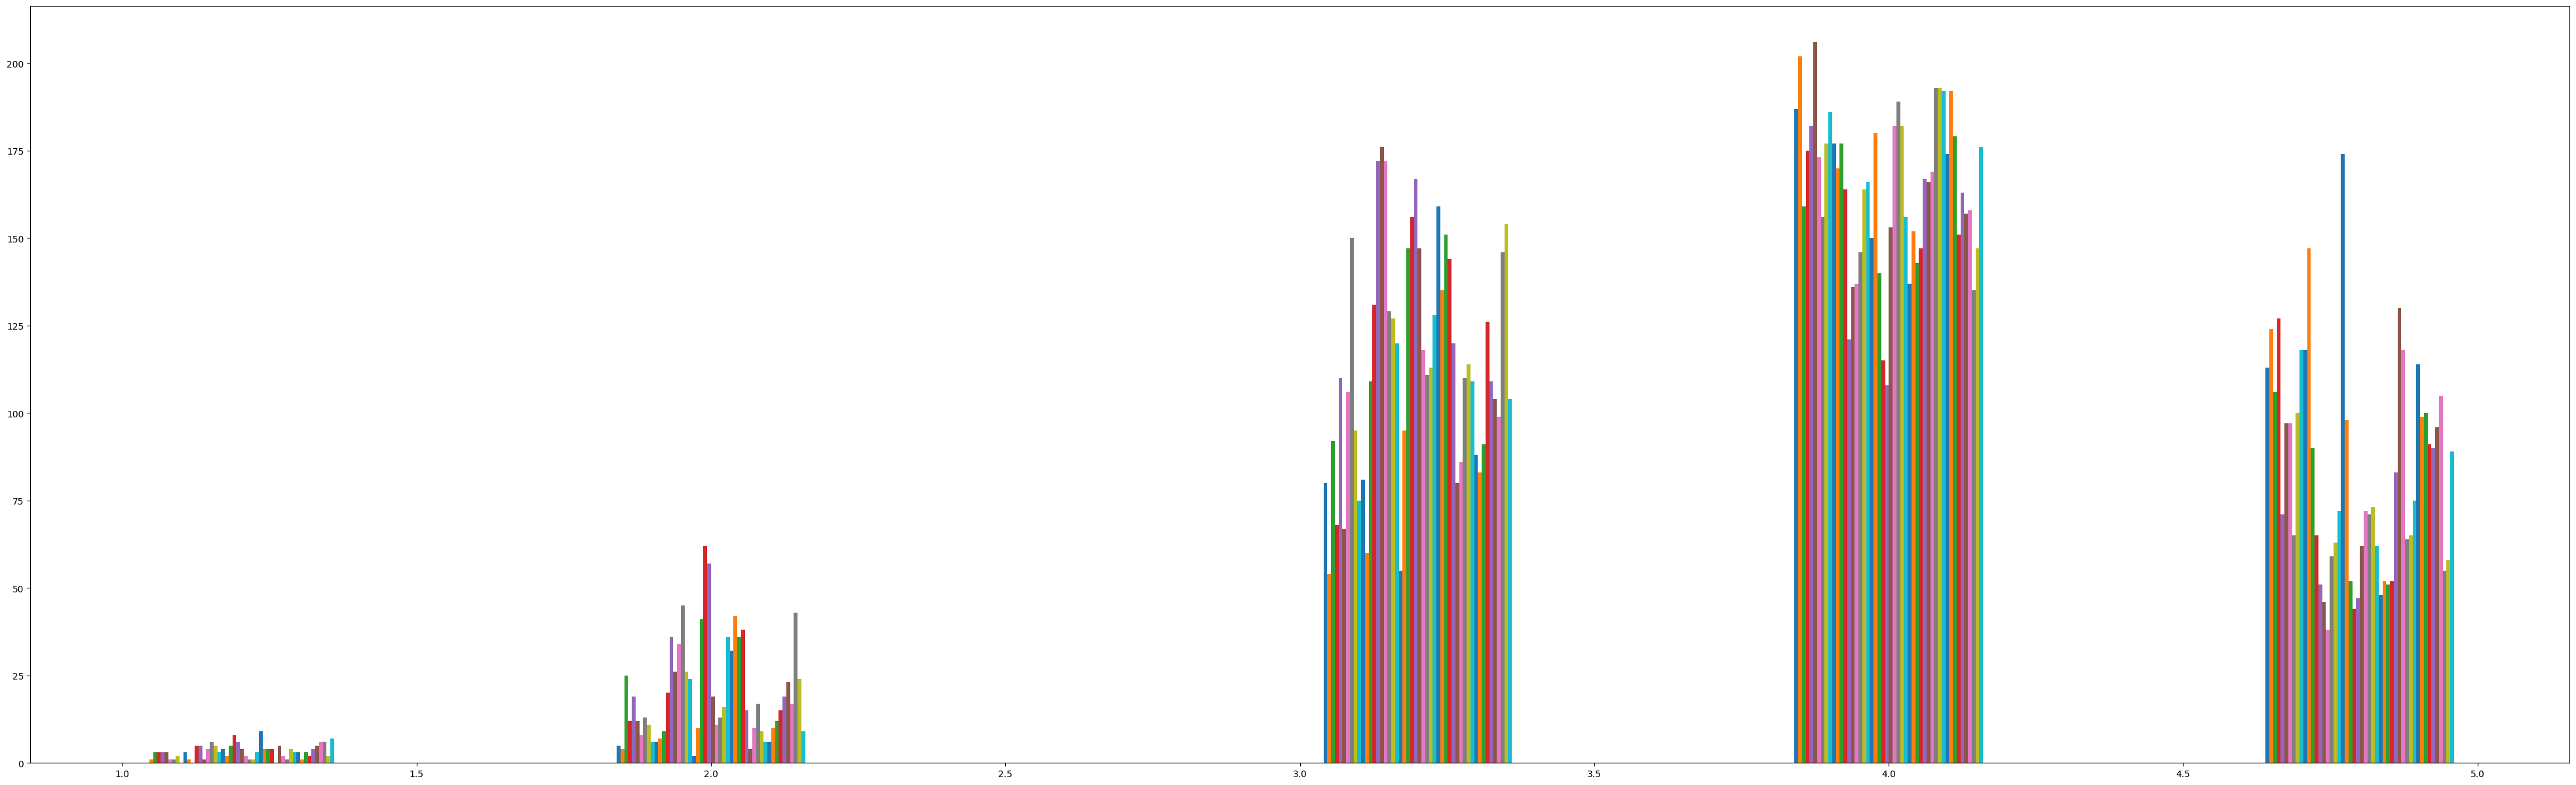

In [109]:
plt.figure(figsize=(50,15))
plt.hist(x=dl_df.drop(columns=["Digital_Literacy", "Class", "Gender", "Mean_T"]))


In [56]:
! pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [57]:
import seaborn as sns

In [85]:
dl_df["Digital_Literacy"]

0      1
1      0
2      1
3      0
4      0
      ..
380    0
381    0
382    1
383    1
384    0
Name: Digital_Literacy, Length: 385, dtype: object

In [84]:
dl_df.drop(columns=["Digital_Literacy", "Class", "Gender", "Mean_T"])

Am1  Am2  Am3  Am4  Am5  Am6  Am7  Am8  Am9  Am10  ...  Es6  Es7  Es8  \
0      5    5    5    4    4    4    4    3    5     5  ...    5    5    5   
1      5    3    4    5    4    4    4    3    5     4  ...    4    4    2   
2      4    4    4    4    4    4    4    4    4     4  ...    4    5    4   
3      5    5    5    5    5    5    5    5    5     3  ...    4    4    5   
4      5    3    5    5    5    5    5    4    4     5  ...    5    3    3   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...  ...   
380    4    5    5    5    3    3    5    3    4     5  ...    4    5    3   
381    5    5    3    3    4    3    4    4    4     3  ...    4    4    3   
382    5    5    5    5    5    5    5    5    5     5  ...    5    5    5   
383    5    5    4    5    4    5    5    4    5     5  ...    5    5    3   
384    4    3    2    5    2    3    3    2    1     3  ...    4    3    3   

     Es9  Es10  Es11  Es12  Es13  Es14  Es15  
0      5     4     5     5     4     5     5  
1      3     2     5     5     5     2     4  
2      4     2     4     5     2     4     5  
3      3     5     3     5     3     3     3  
4      3     5     3     5     1     4     5  
..   ...   ...   ...   ...   ...   ...   ...  
380    3     5     5     4     4     5     1  
381    3     3     4     4     3     5     4  
382    5     5     5     2     5     5     1  
383    5     5     4     2     4     4     4  
384    4     5     4     4     4     4     3  

[385 rows x 50 columns]

<Axes: ylabel='Density'>

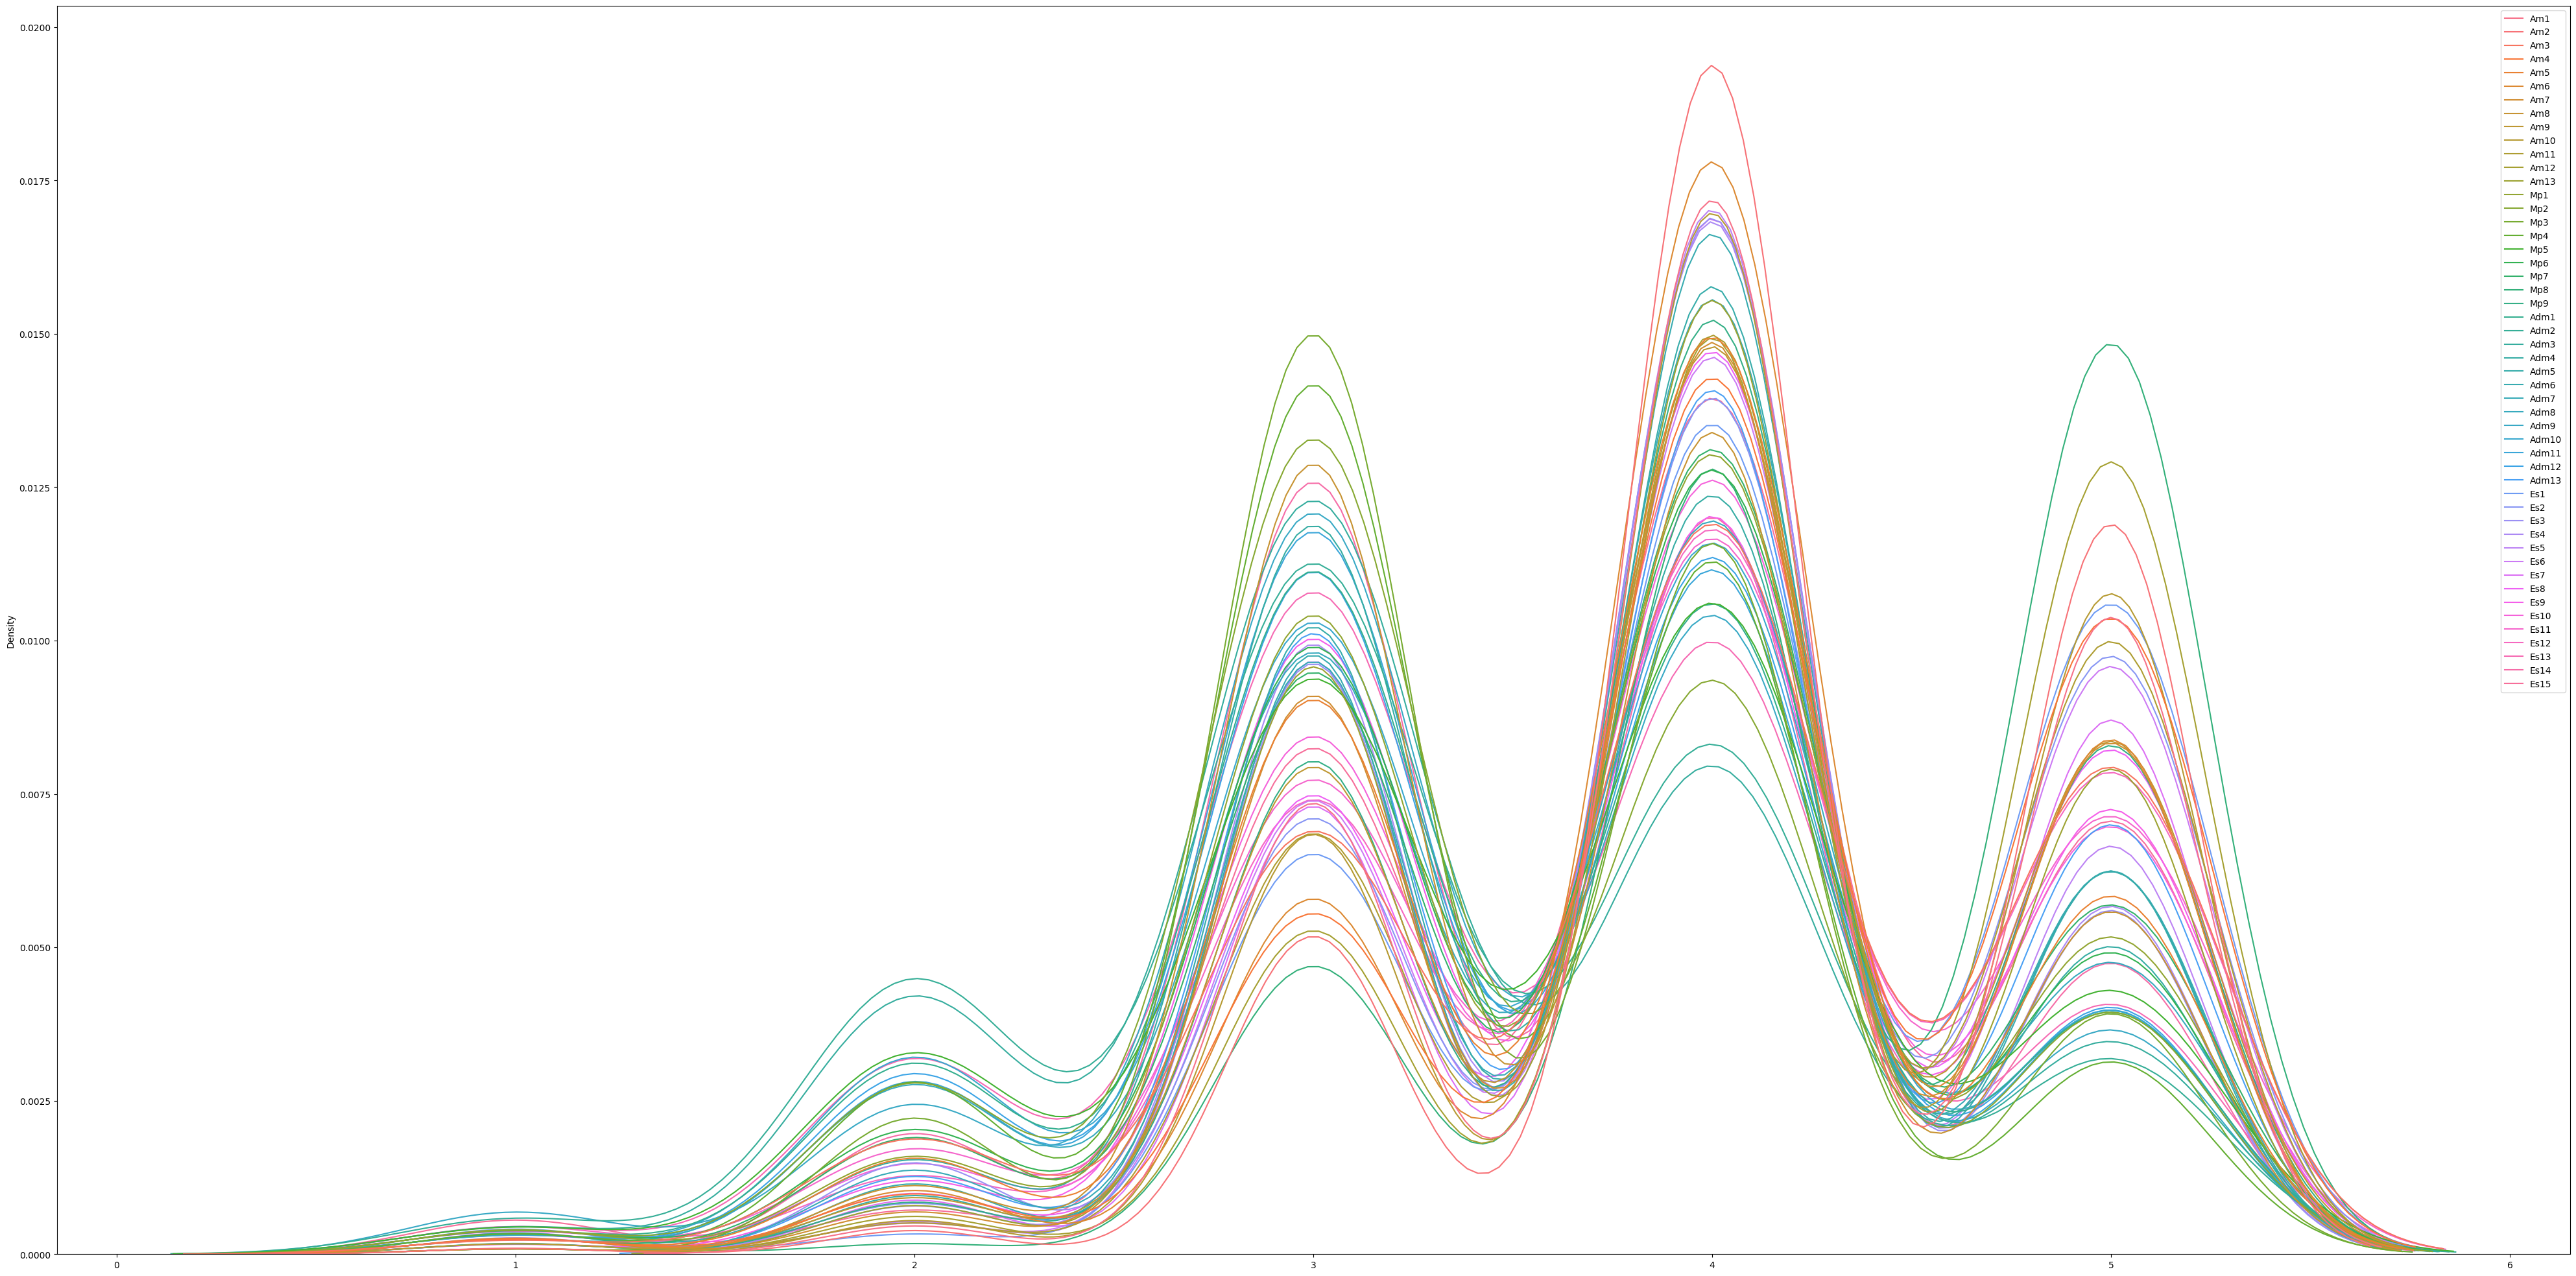

In [114]:
plt.figure(figsize=(50,25))
sns.kdeplot(dl_df.drop(columns=["Digital_Literacy", "Class", "Gender", "Mean_T"]))

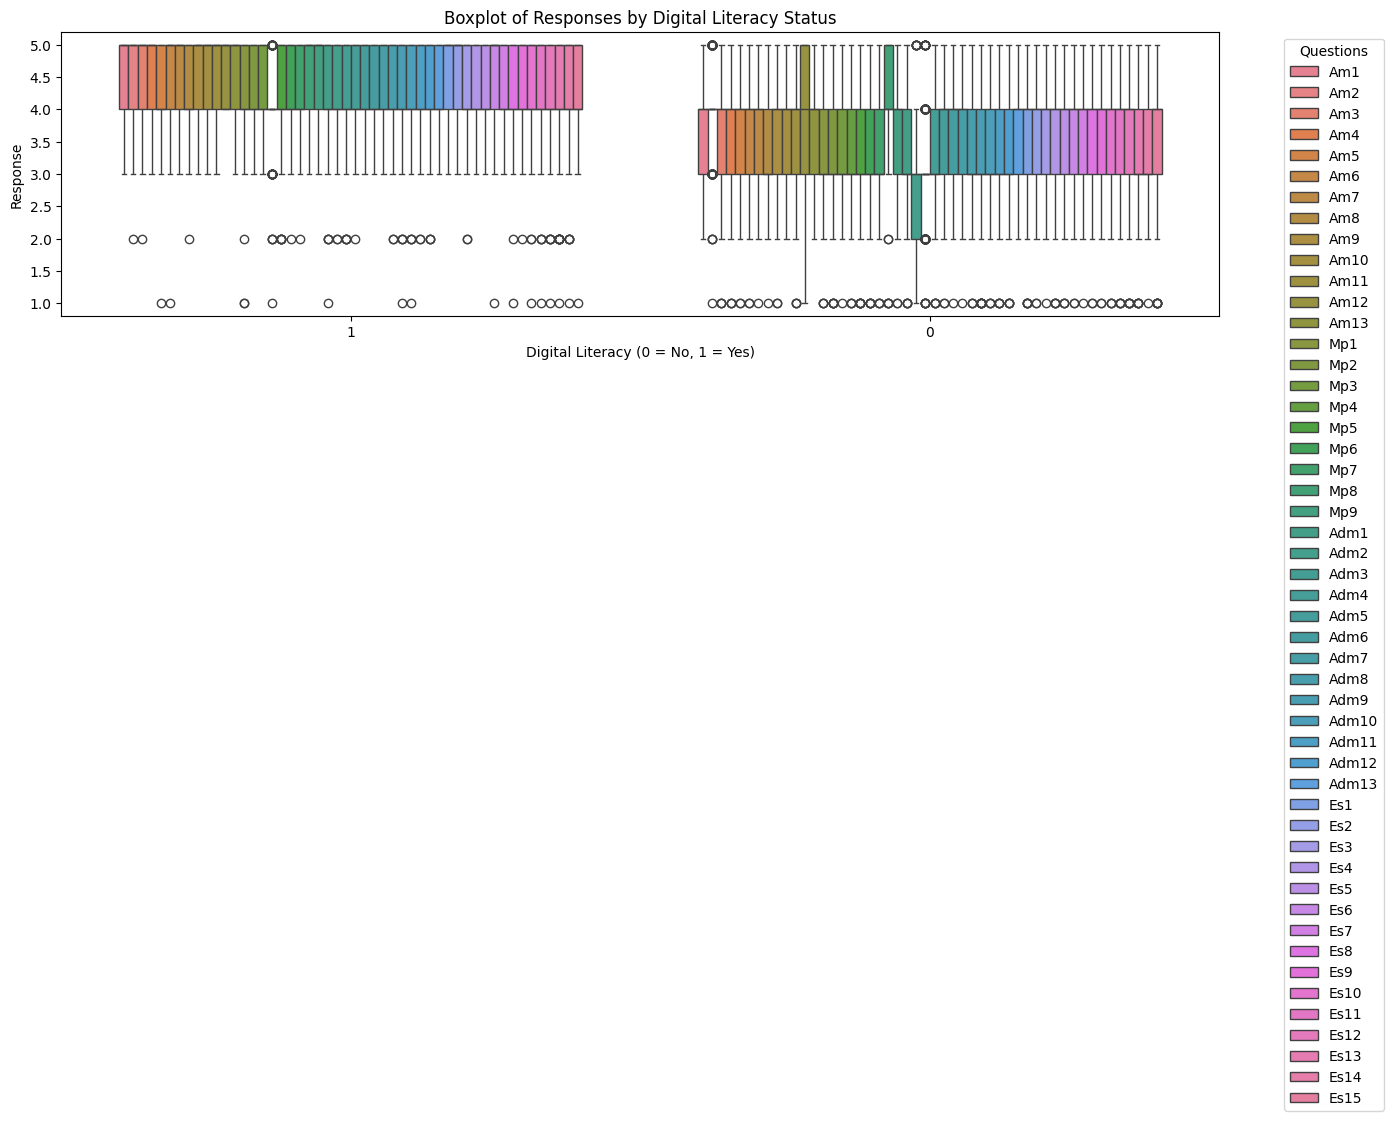

In [116]:
# Specify all relevant columns for melting
response_columns = [
    'Am1', 'Am2', 'Am3', 'Am4', 'Am5', 'Am6', 'Am7', 'Am8', 'Am9', 'Am10',
    'Am11', 'Am12', 'Am13', 'Mp1', 'Mp2', 'Mp3', 'Mp4', 'Mp5', 'Mp6', 'Mp7',
    'Mp8', 'Mp9', 'Adm1', 'Adm2', 'Adm3', 'Adm4', 'Adm5', 'Adm6', 'Adm7',
    'Adm8', 'Adm9', 'Adm10', 'Adm11', 'Adm12', 'Adm13', 'Es1', 'Es2', 'Es3',
    'Es4', 'Es5', 'Es6', 'Es7', 'Es8', 'Es9', 'Es10', 'Es11', 'Es12', 'Es13',
    'Es14', 'Es15'
]

# Melt the DataFrame to long format
melted_df = dl_df.melt(id_vars=['Digital_Literacy'], 
                        value_vars=response_columns, 
                        var_name='Question', 
                        value_name='Response')
plt.figure(figsize=(14, 8))
sns.boxplot(x='Digital_Literacy', y='Response', hue='Question', data=melted_df)
plt.title('Boxplot of Responses by Digital Literacy Status')
plt.xlabel('Digital Literacy (0 = No, 1 = Yes)')
plt.ylabel('Response')
plt.legend(title='Questions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



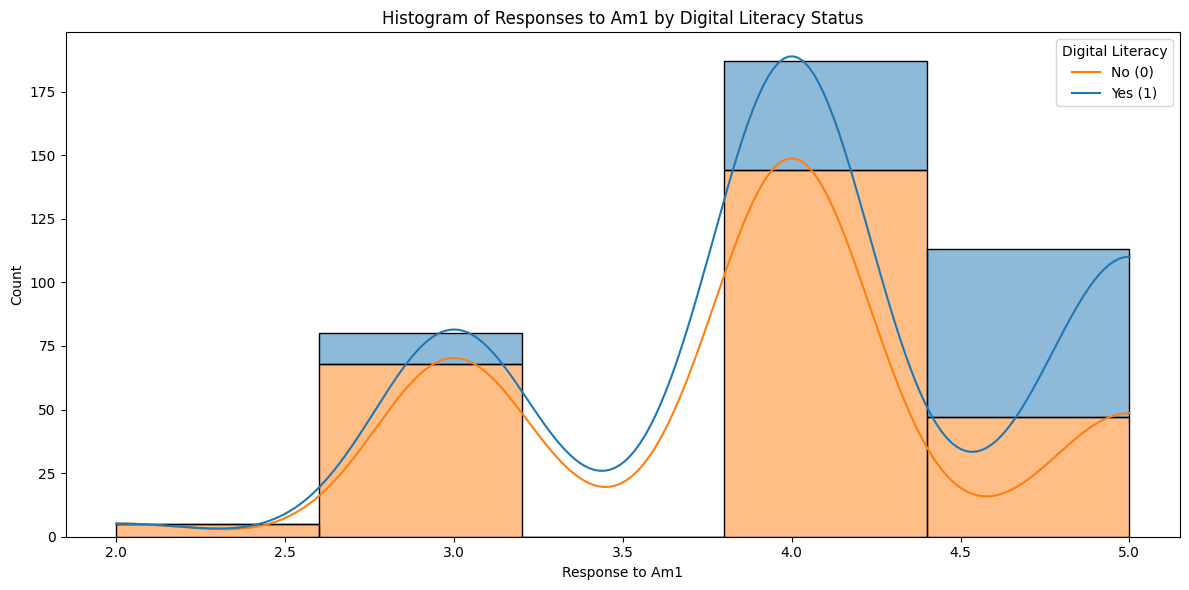

In [117]:
# Filter the DataFrame for a specific question, e.g., Am1
plt.figure(figsize=(12, 6))

# Plot histogram for responses to Am1, colored by Digital_Literacy
sns.histplot(data=dl_df, x='Am1', hue='Digital_Literacy', multiple='stack', bins=5, kde=True)
plt.title('Histogram of Responses to Am1 by Digital Literacy Status')
plt.xlabel('Response to Am1')
plt.ylabel('Count')
plt.legend(title='Digital Literacy', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()


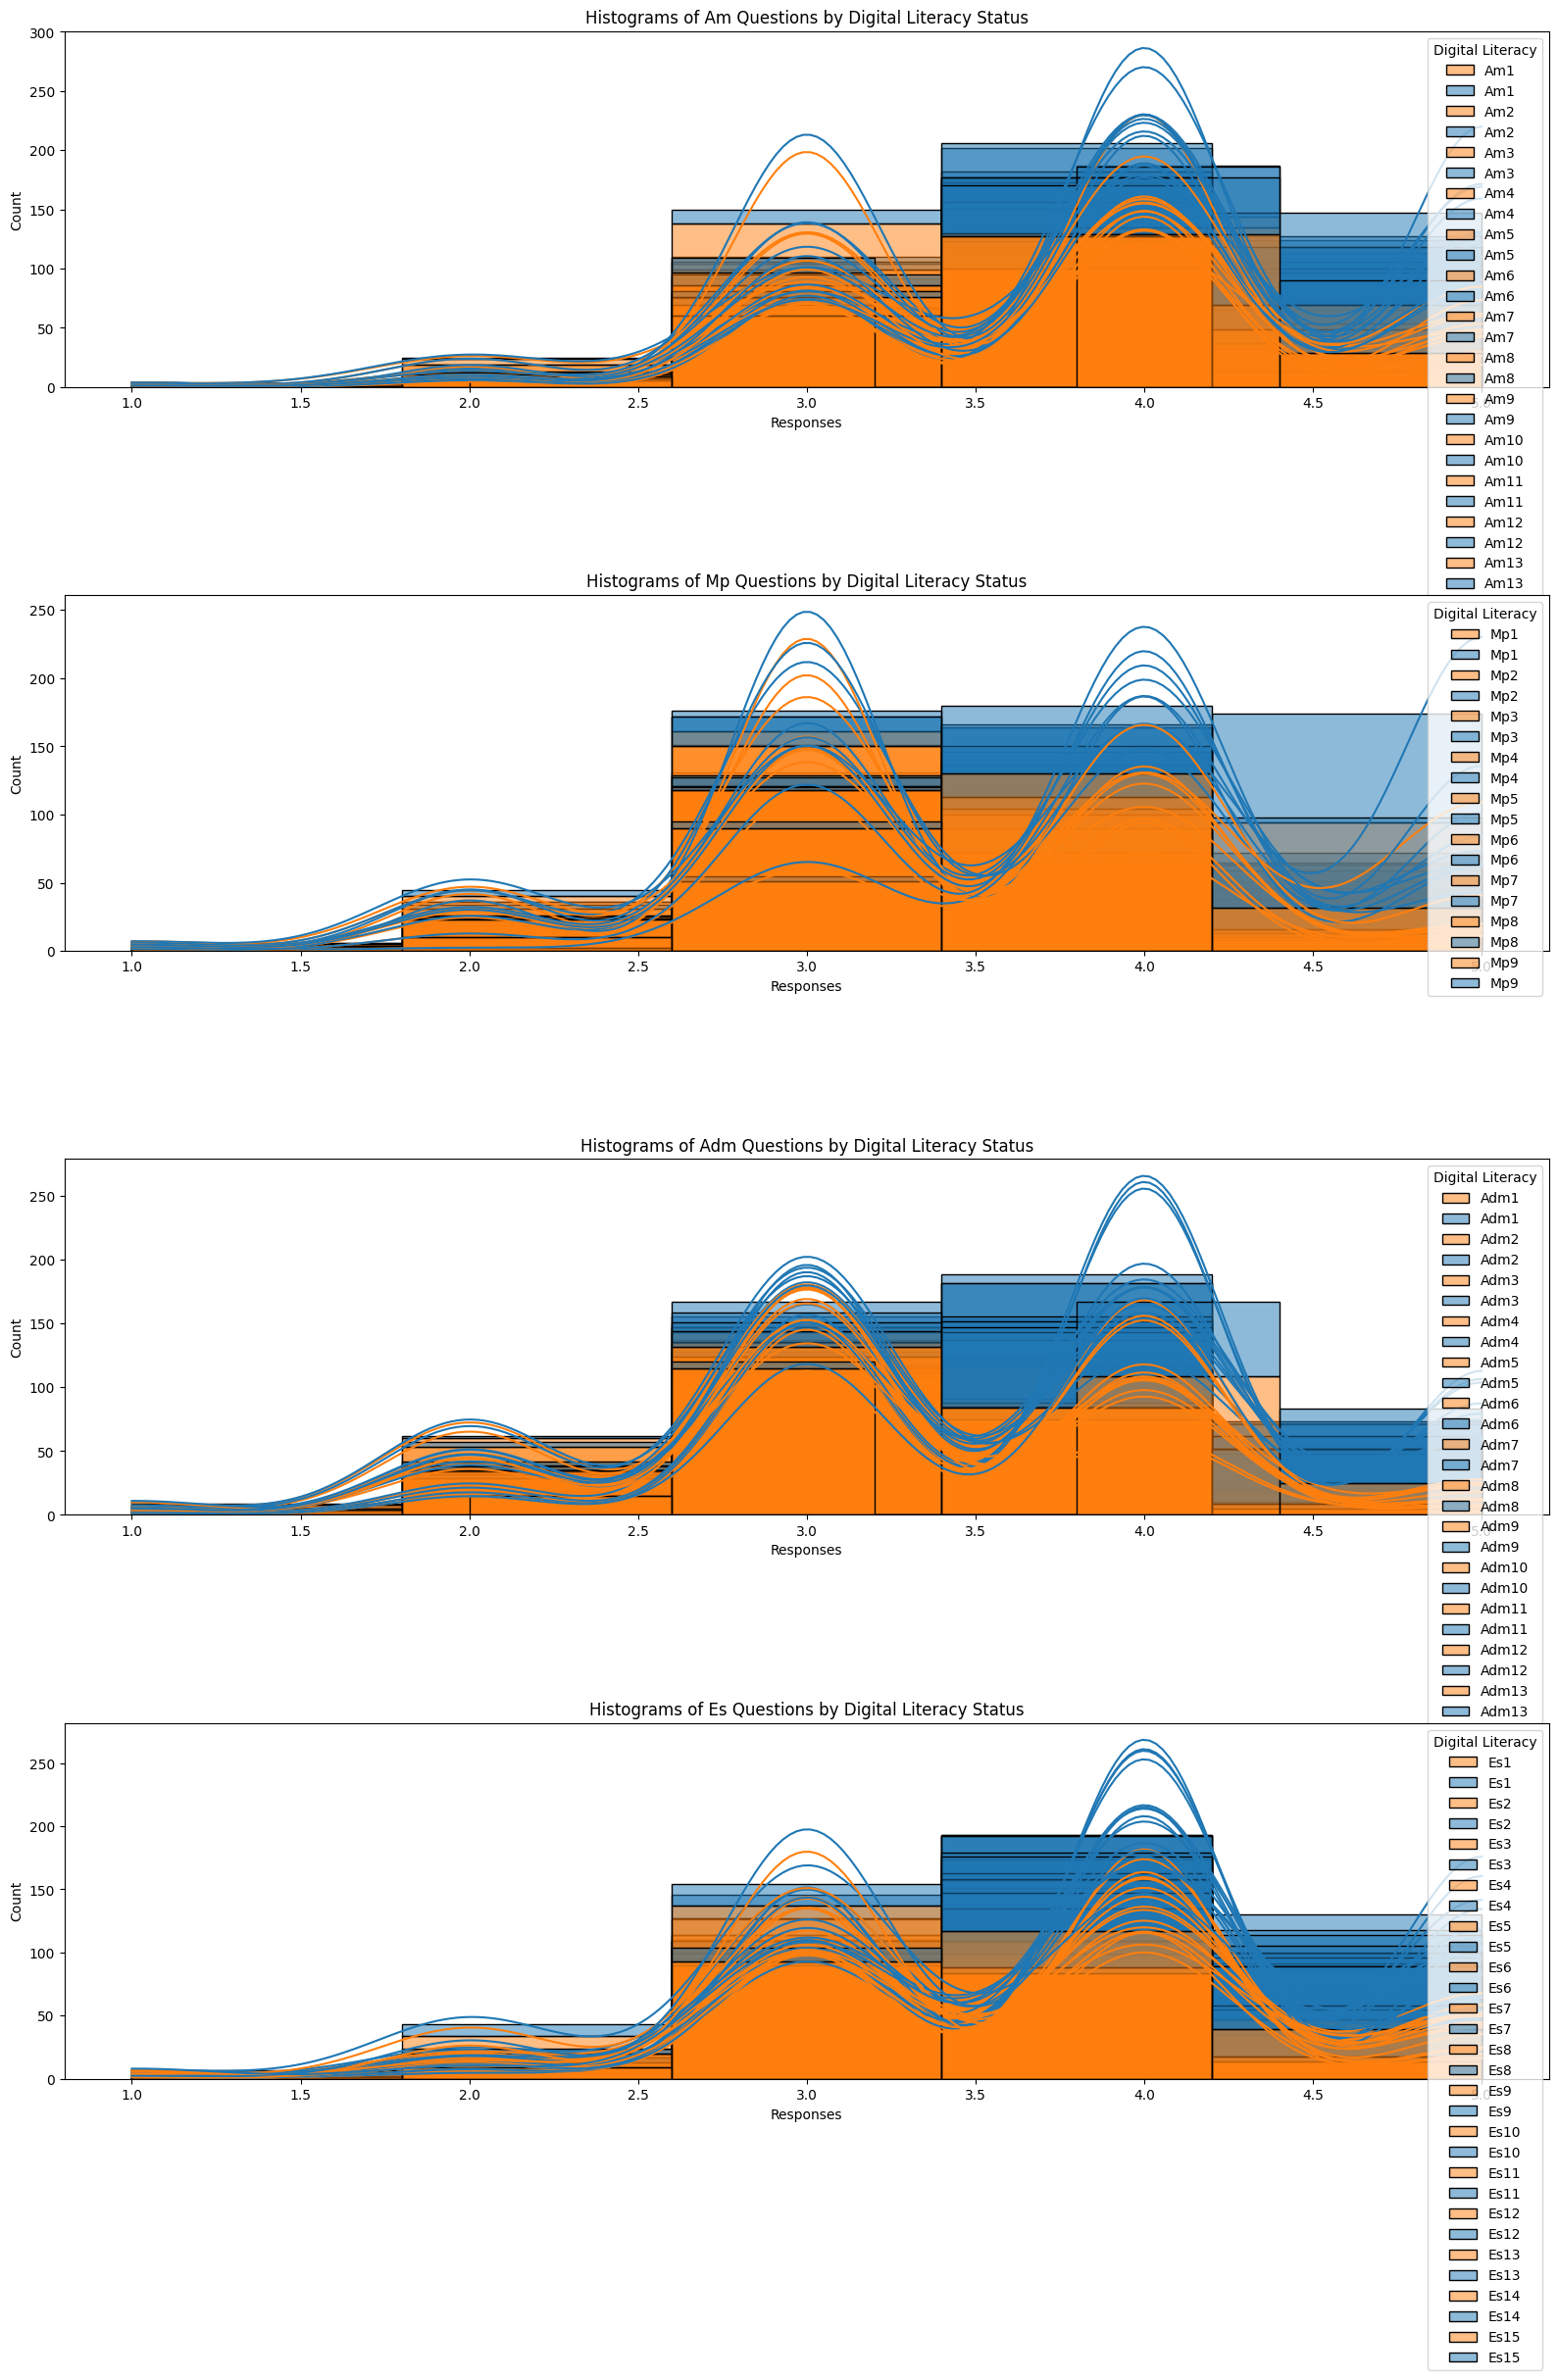

In [130]:
num_groups = len(question_groups)
fig, axes = plt.subplots(num_groups, 1, figsize=(16, 6 * num_groups))

# Loop through each question group and plot
for ax, (group_name, questions) in zip(axes, question_groups.items()):
    for question in questions:
        sns.histplot(
            data=dl_df,
            x=question,
            hue='Digital_Literacy',
            multiple='stack',
            bins=5,
            kde=True,
            ax=ax,
            label=question,
            alpha=0.5  # Set transparency for better visibility
        )
    
    ax.set_title(f'Histograms of {group_name} by Digital Literacy Status')
    ax.set_xlabel('Responses')
    ax.set_ylabel('Count')
    ax.legend(title='Digital Literacy', loc='upper right', bbox_to_anchor=(1, 1))

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


C:\Users\ead\AppData\Local\Temp\ipykernel_13772\282331560.py:18: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.kdeplot(
C:\Users\ead\AppData\Local\Temp\ipykernel_13772\282331560.py:18: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.kdeplot(
C:\Users\ead\AppData\Local\Temp\ipykernel_13772\282331560.py:18: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.kdeplot(
C:\Users\ead\AppData\Local\Temp\ipykernel_13772\282331560.py:18: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.kdeplot(
C:\Users\ead\AppData\Local\Temp\ipykernel_13772\282331560.py:18: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an un

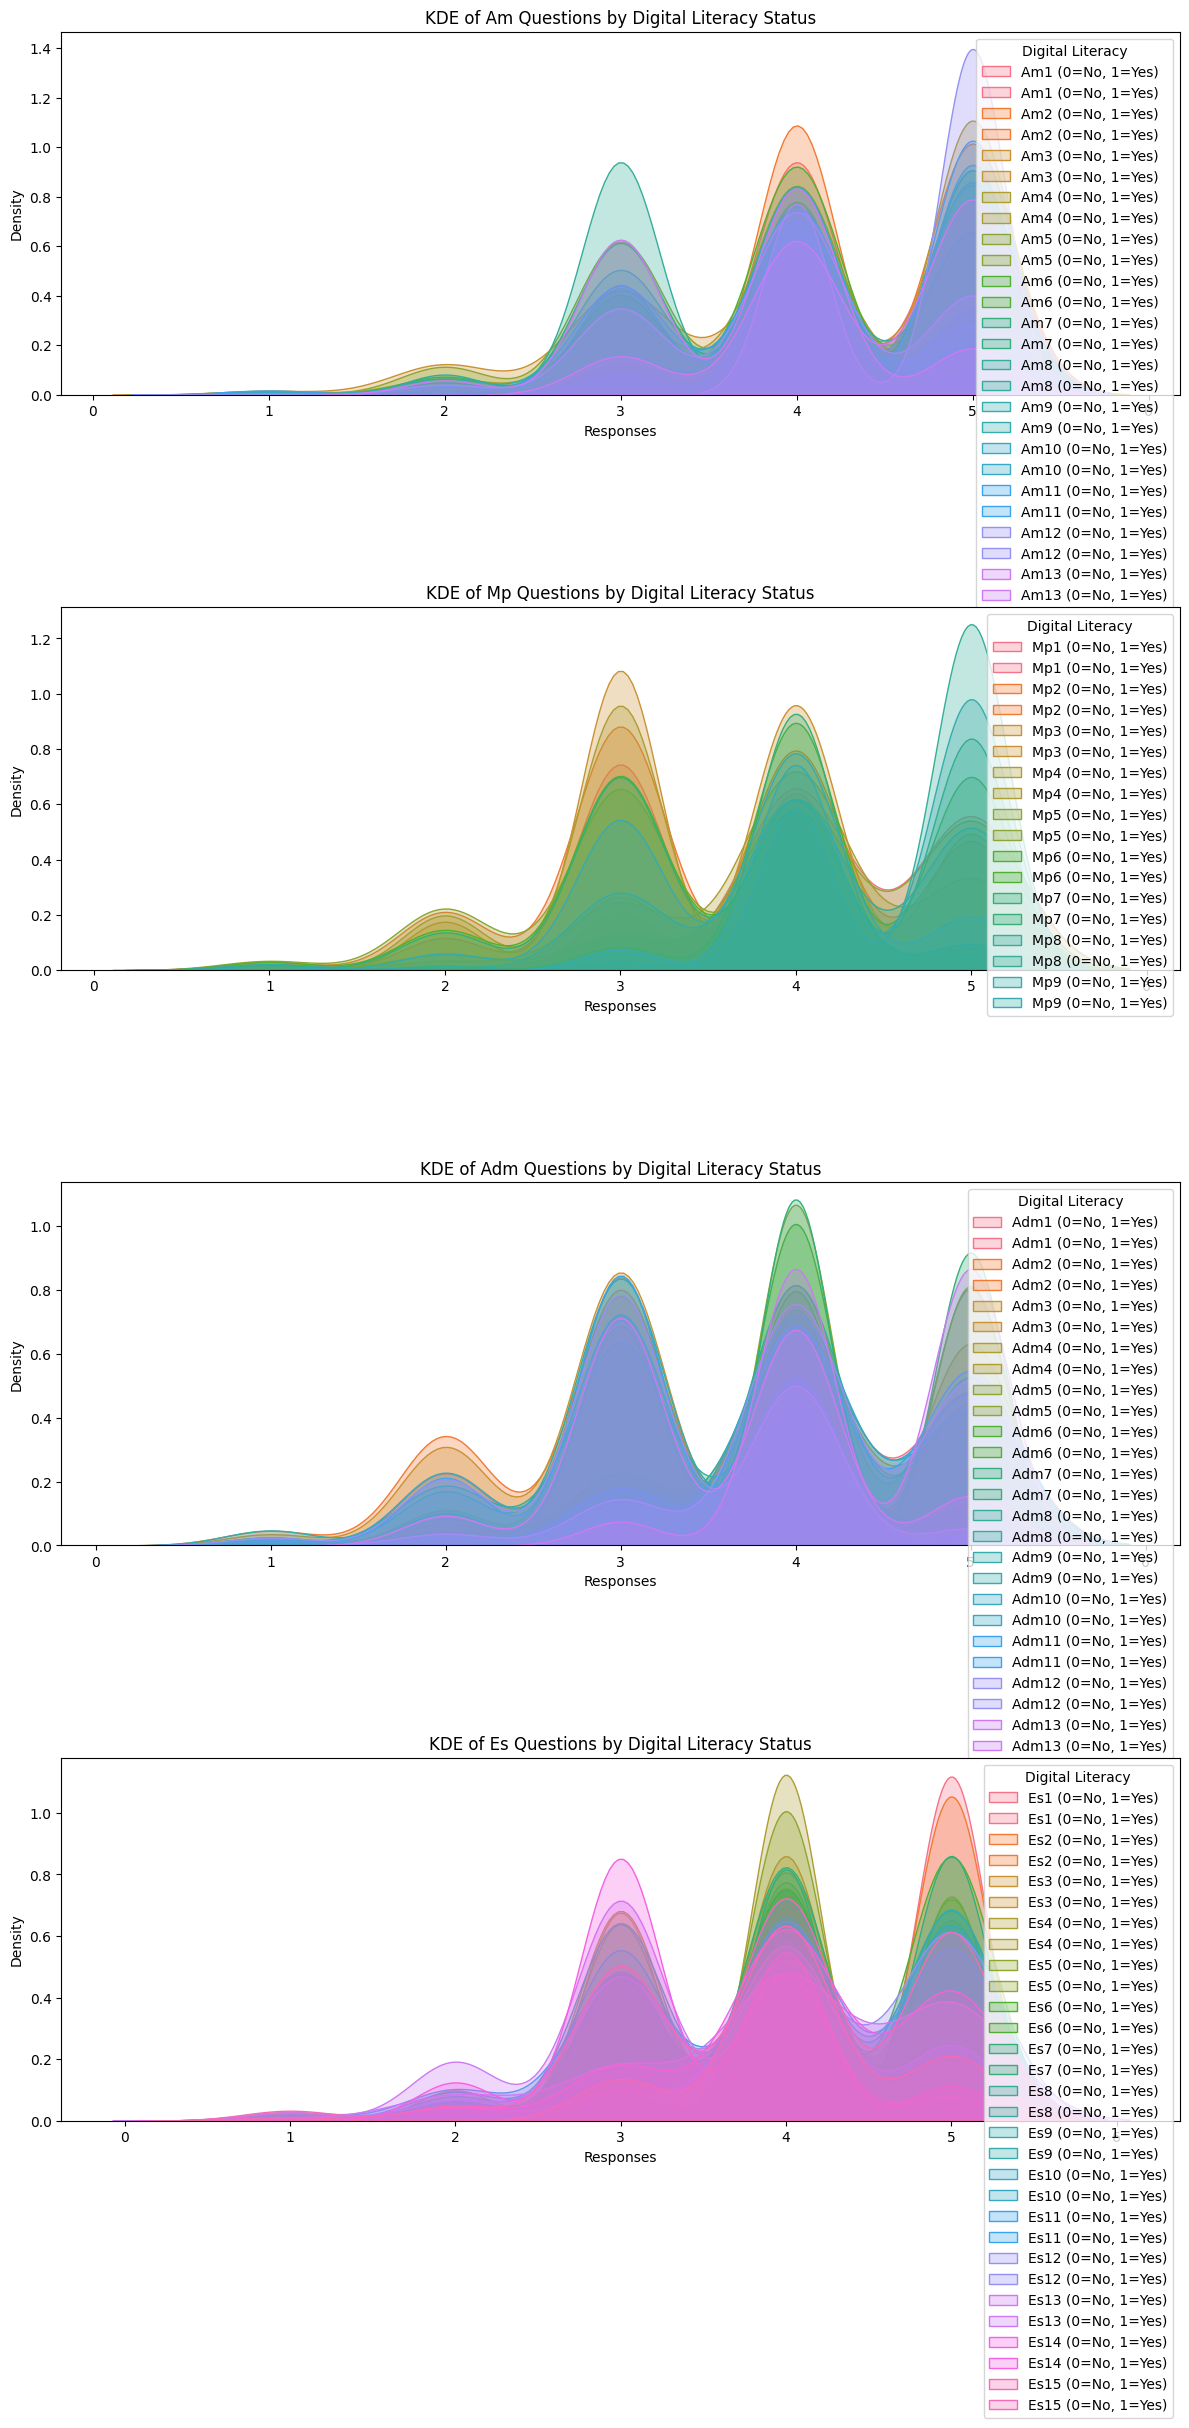

In [131]:
question_groups = {
    'Am Questions': [f'Am{i}' for i in range(1, 14)],
    'Mp Questions': [f'Mp{i}' for i in range(1, 10)],
    'Adm Questions': [f'Adm{i}' for i in range(1, 14)],
    'Es Questions': [f'Es{i}' for i in range(1, 16)]
}

# Create subplots for each group
num_groups = len(question_groups)
fig, axes = plt.subplots(num_groups, 1, figsize=(12, 6 * num_groups))

# Define a color palette
colors = sns.color_palette("husl", 15)

# Loop through each question group and plot KDE
for ax, (group_name, questions) in zip(axes, question_groups.items()):
    for i, question in enumerate(questions):
        sns.kdeplot(
            data=dl_df,
            x=question,
            hue='Digital_Literacy',
            common_norm=False,
            fill=True,
            palette=[colors[i % len(colors)]],
            ax=ax,
            label=f'{question} (0=No, 1=Yes)',
            alpha=0.3
        )
    
    ax.set_title(f'KDE of {group_name} by Digital Literacy Status')
    ax.set_xlabel('Responses')
    ax.set_ylabel('Density')
    ax.legend(title='Digital Literacy', loc='upper right', bbox_to_anchor=(1, 1))

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

C:\Users\ead\AppData\Local\Temp\ipykernel_13772\1675487329.py:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.kdeplot(
C:\Users\ead\AppData\Local\Temp\ipykernel_13772\1675487329.py:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.kdeplot(
C:\Users\ead\AppData\Local\Temp\ipykernel_13772\1675487329.py:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.kdeplot(
C:\Users\ead\AppData\Local\Temp\ipykernel_13772\1675487329.py:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.kdeplot(


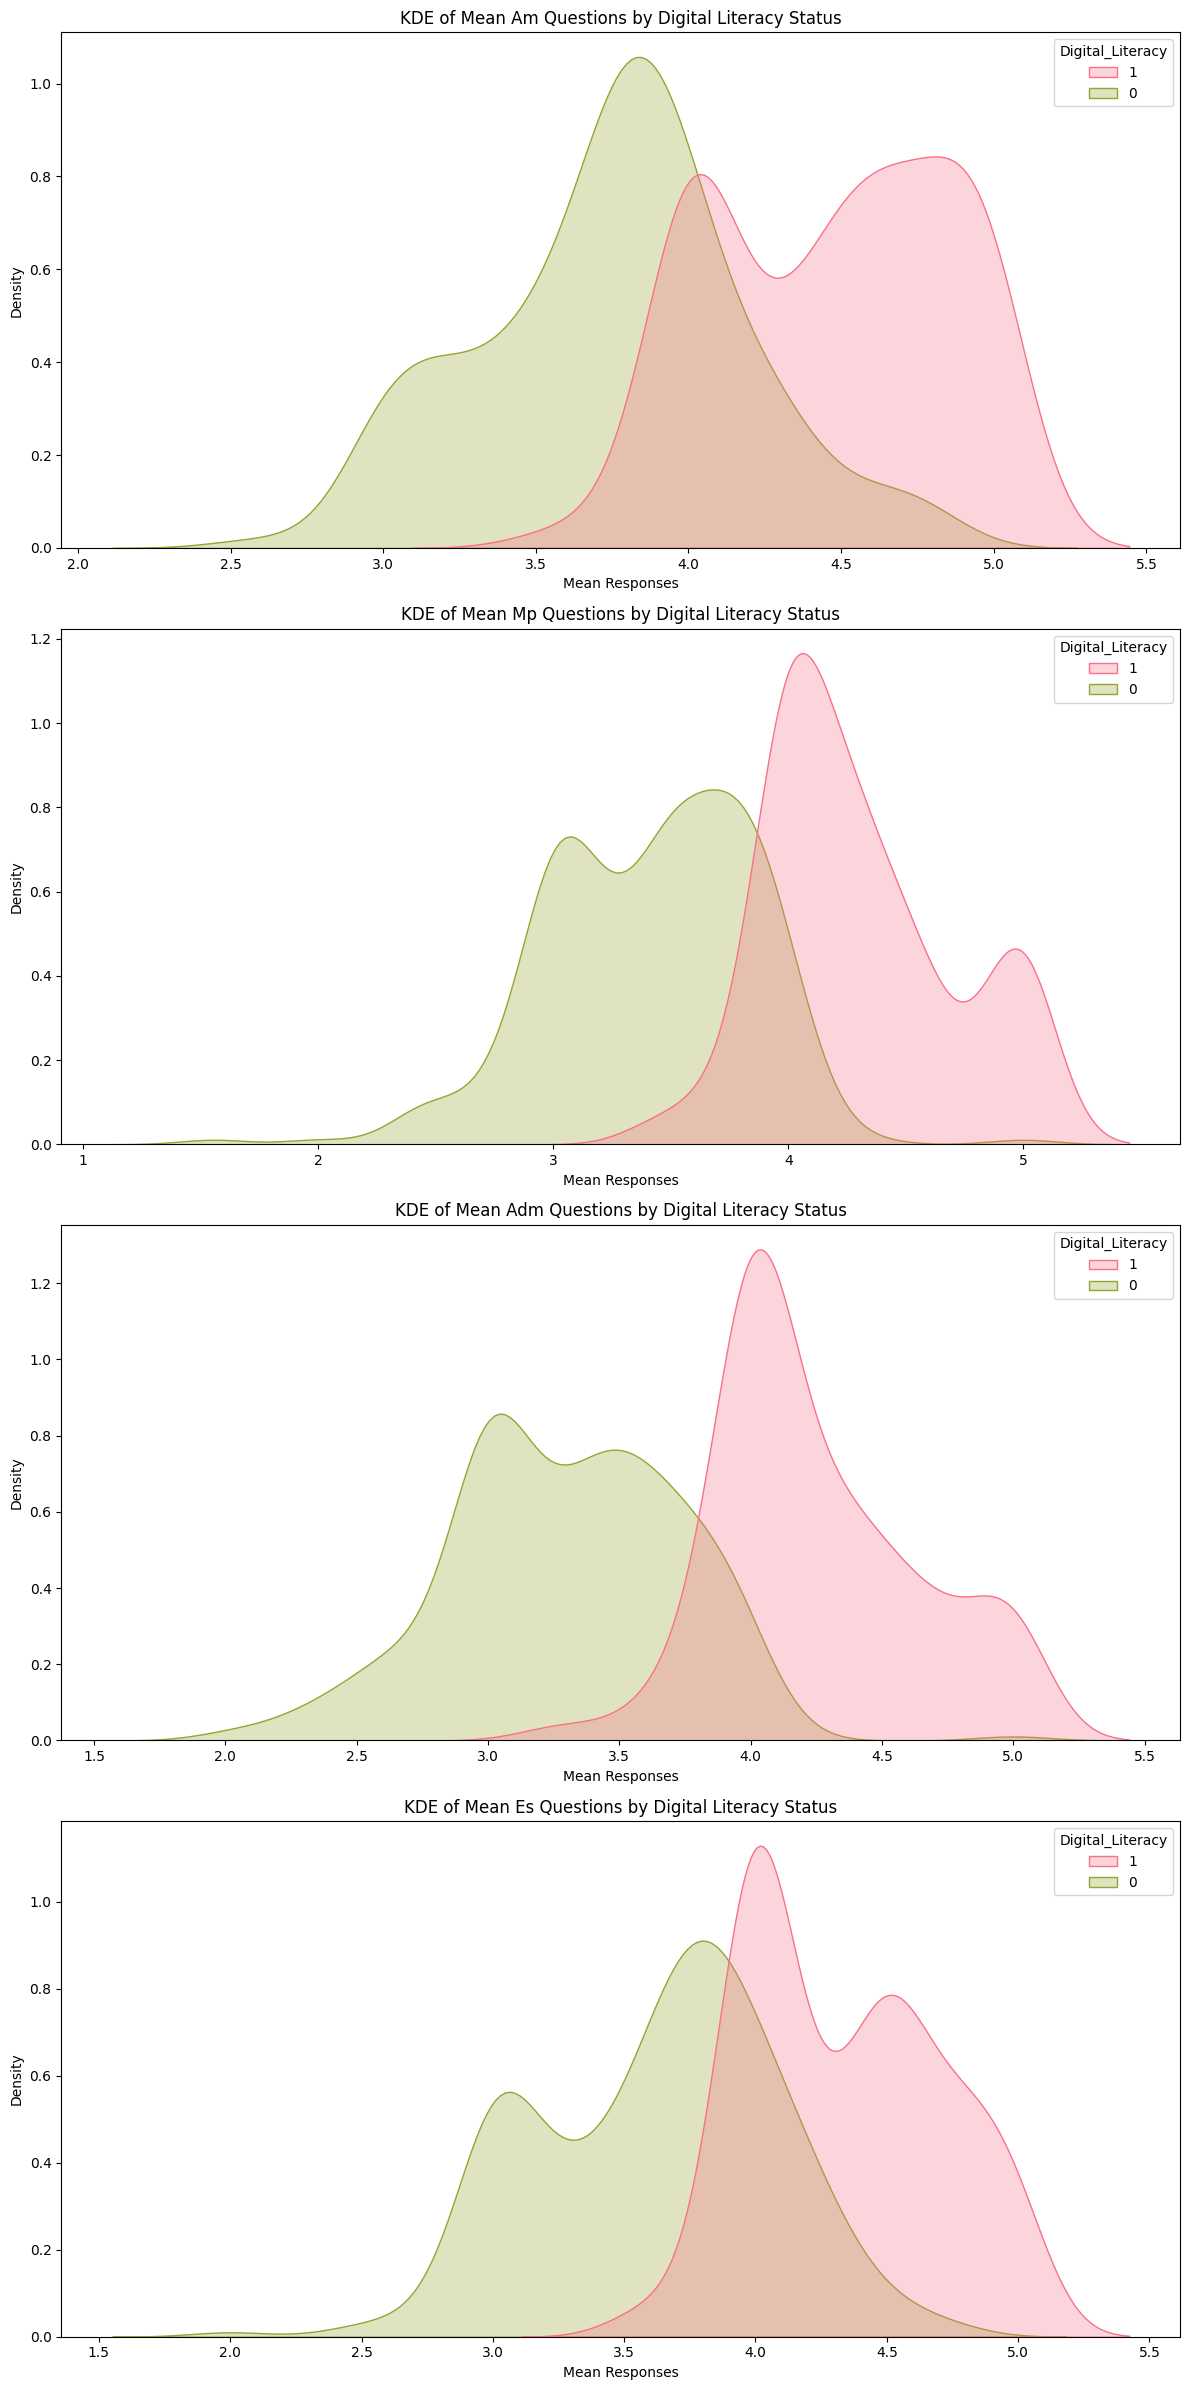

In [132]:
mean_df = pd.DataFrame()
mean_df['Digital_Literacy'] = dl_df['Digital_Literacy']

for group_name, questions in question_groups.items():
    mean_df[group_name] = dl_df[questions].mean(axis=1)

# Create a KDE plot for each group of mean responses
num_groups = len(question_groups)
fig, axes = plt.subplots(num_groups, 1, figsize=(12, 6 * num_groups))

# Define a color palette
colors = sns.color_palette("husl", 4)

# Loop through each group and plot KDE
for ax, (group_name) in zip(axes, question_groups.keys()):
    sns.kdeplot(
        data=mean_df,
        x=group_name,
        hue='Digital_Literacy',
        common_norm=False,
        fill=True,
        palette=colors,
        ax=ax,
        alpha=0.3
    )
    
    ax.set_title(f'KDE of Mean {group_name} by Digital Literacy Status')
    ax.set_xlabel('Mean Responses')
    ax.set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

C:\Users\ead\AppData\Local\Temp\ipykernel_13772\2928190286.py:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.histplot(
C:\Users\ead\AppData\Local\Temp\ipykernel_13772\2928190286.py:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.histplot(
C:\Users\ead\AppData\Local\Temp\ipykernel_13772\2928190286.py:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.histplot(
C:\Users\ead\AppData\Local\Temp\ipykernel_13772\2928190286.py:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.histplot(


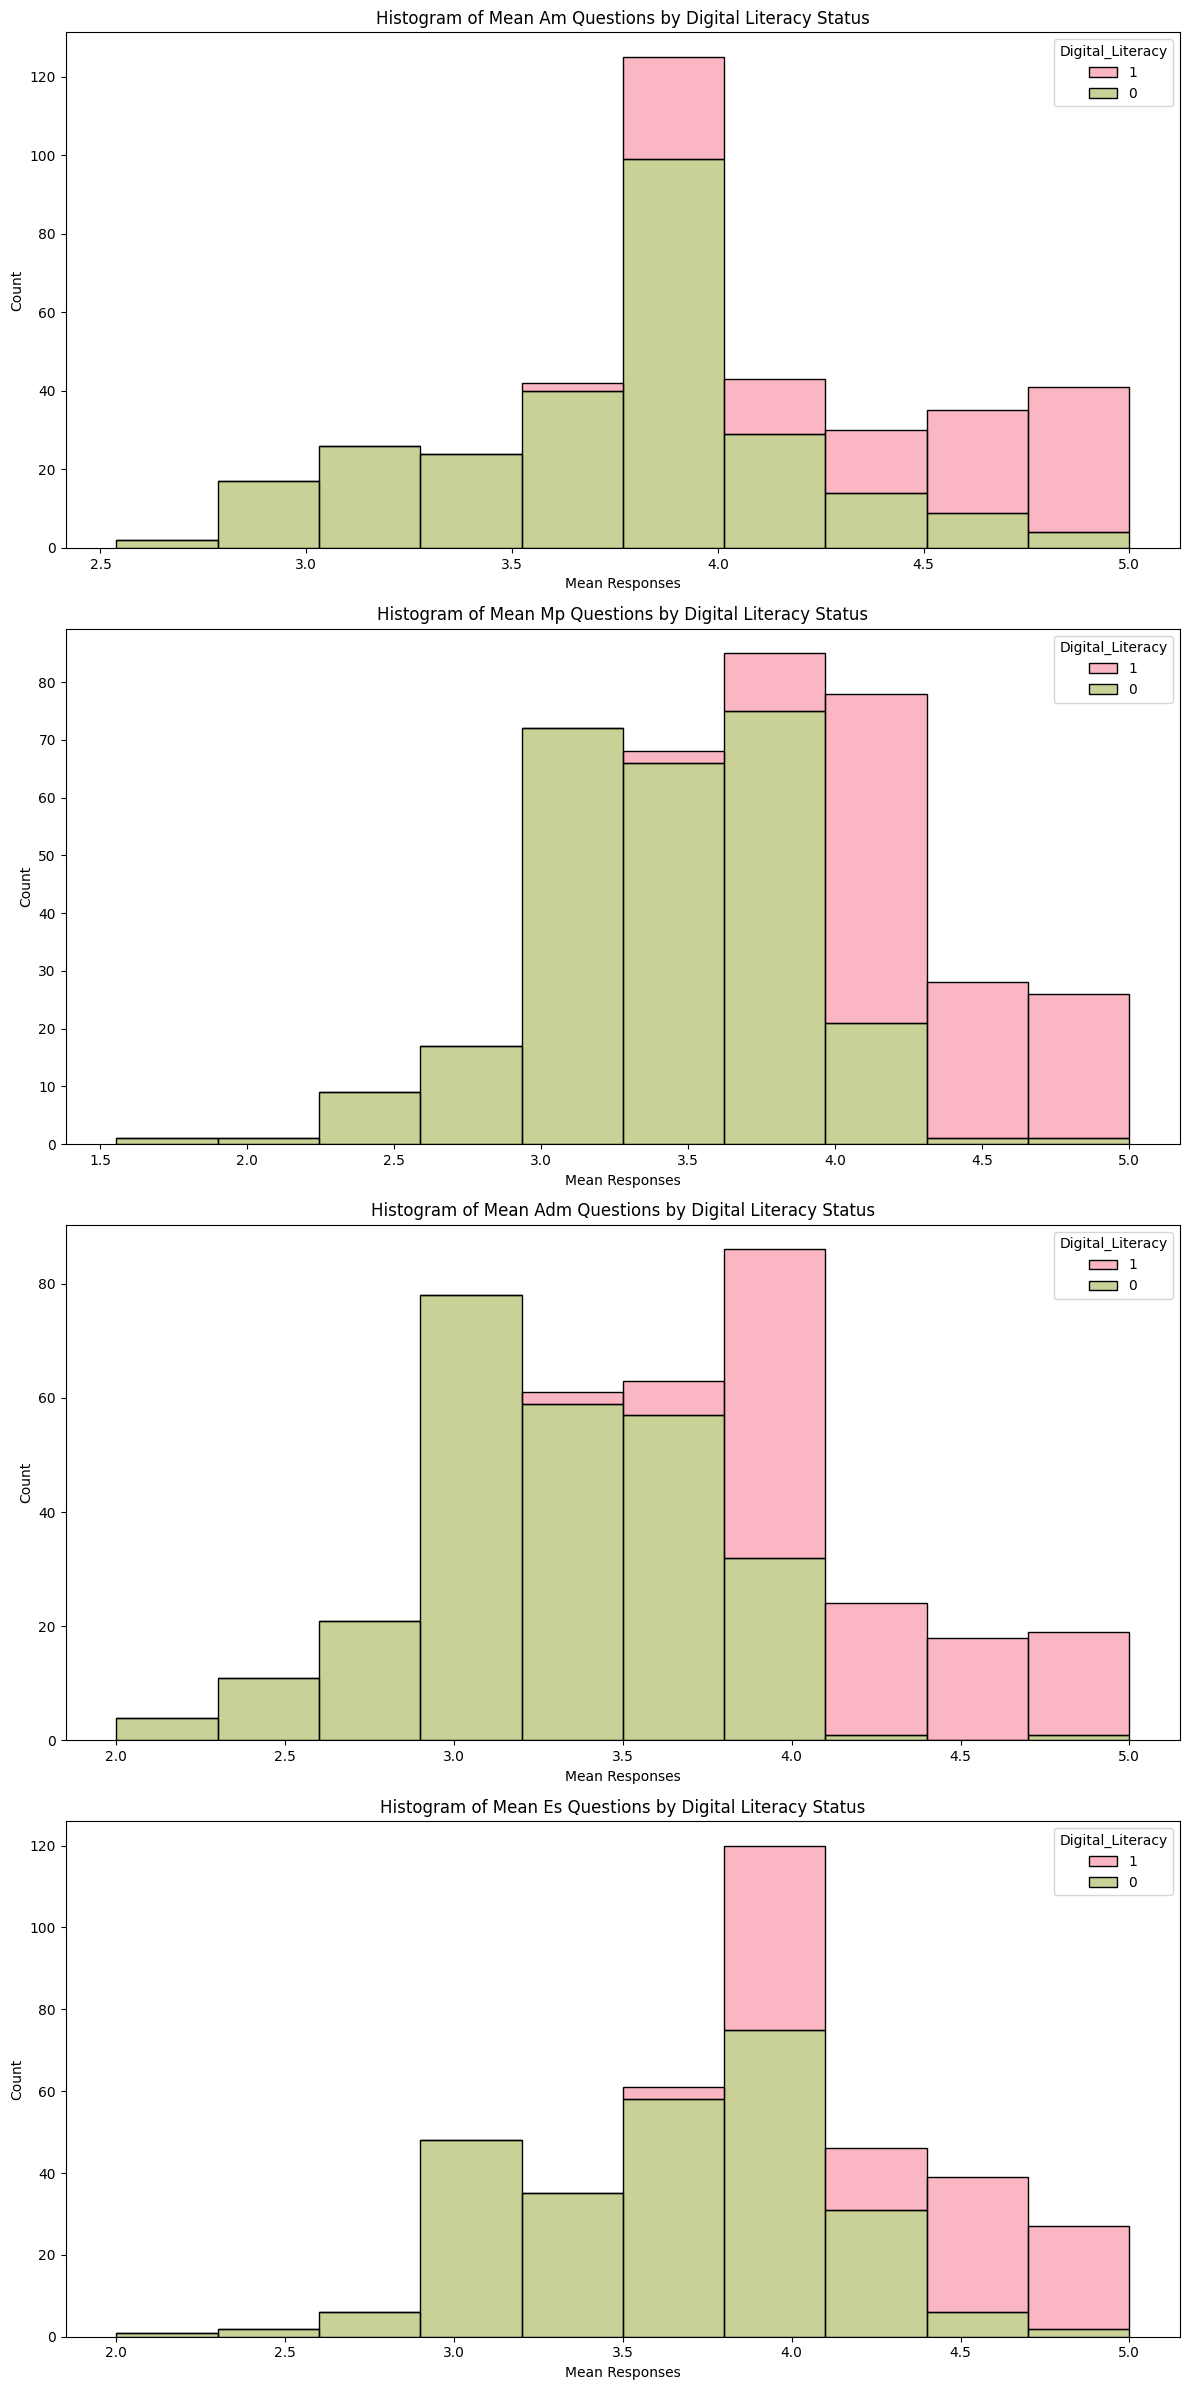

In [133]:
mean_df = pd.DataFrame()
mean_df['Digital_Literacy'] = dl_df['Digital_Literacy']

for group_name, questions in question_groups.items():
    mean_df[group_name] = dl_df[questions].mean(axis=1)

# Create a histogram for each group of mean responses
num_groups = len(question_groups)
fig, axes = plt.subplots(num_groups, 1, figsize=(12, 6 * num_groups))

# Define a color palette
colors = sns.color_palette("husl", num_groups)

# Loop through each group and plot histograms
for ax, (group_name) in zip(axes, question_groups.keys()):
    sns.histplot(
        data=mean_df,
        x=group_name,
        hue='Digital_Literacy',
        multiple='stack',
        bins=10,  # Adjust the number of bins as needed
        palette=colors,
        ax=ax,
        alpha=0.5
    )
    
    ax.set_title(f'Histogram of Mean {group_name} by Digital Literacy Status')
    ax.set_xlabel('Mean Responses')
    ax.set_ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

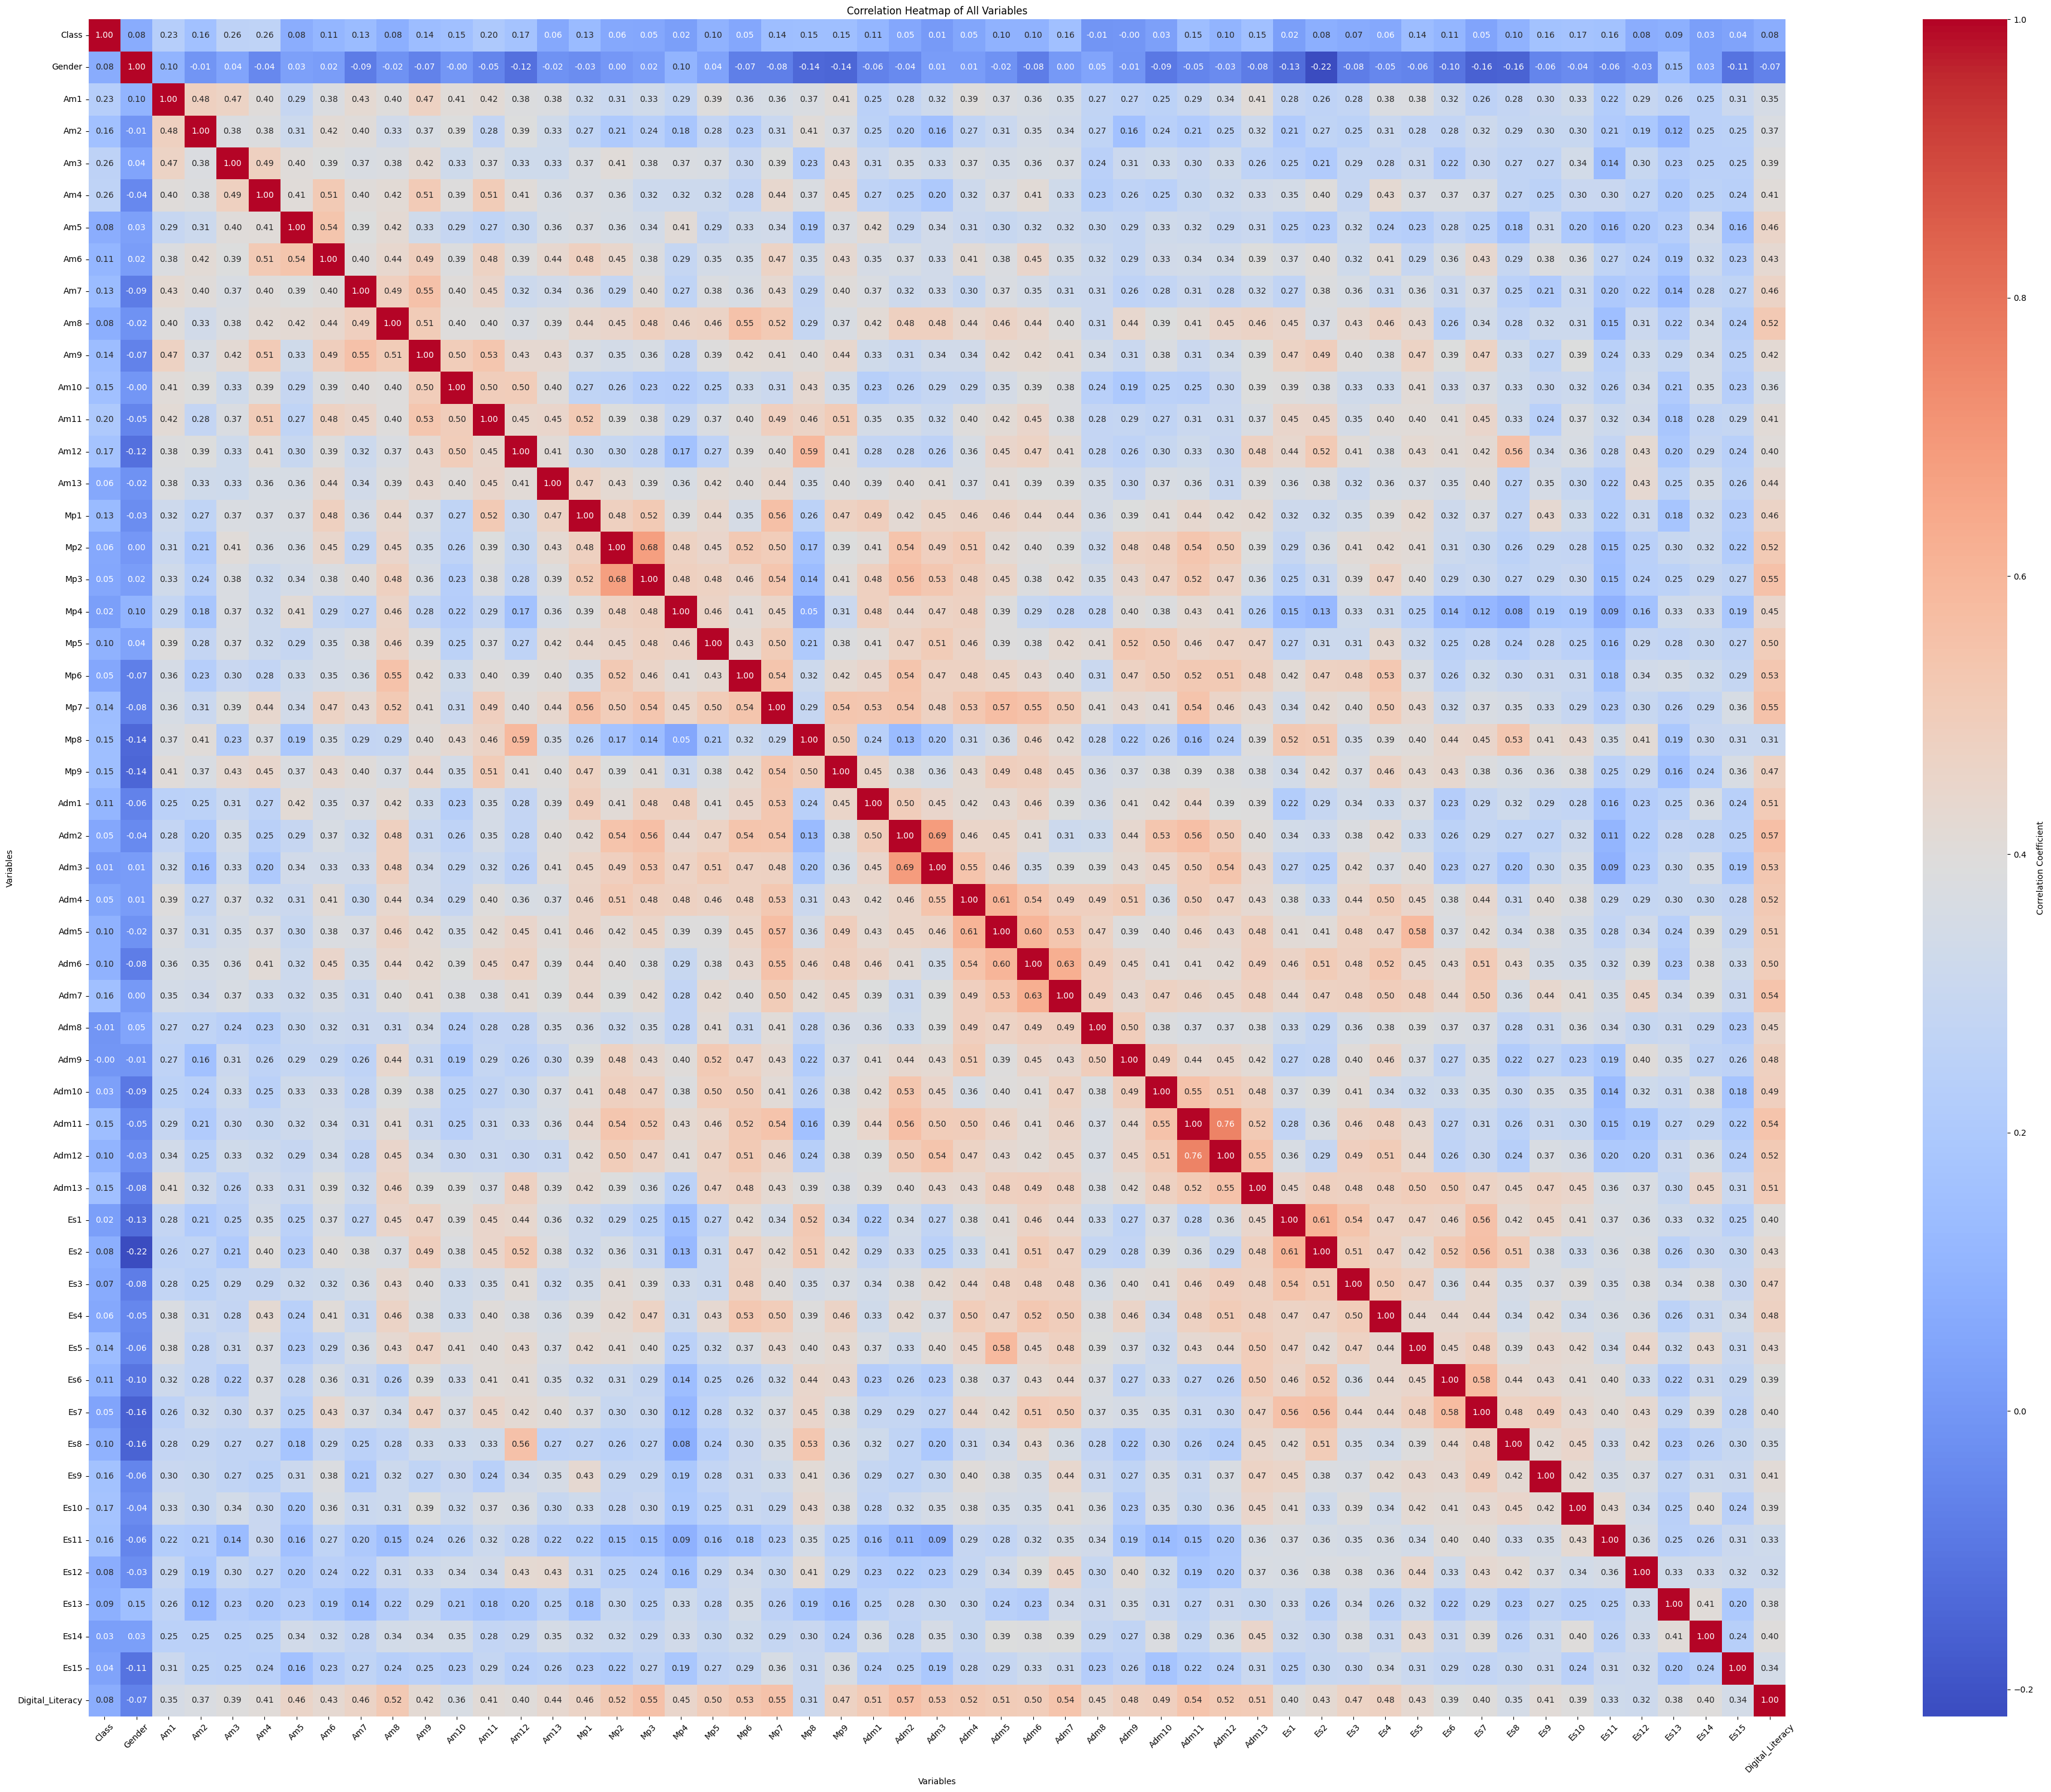

In [143]:
df_u = dl_df.drop(columns="Mean_T")
correlation_matrix = df_u.corr()

# Create the heatmap
plt.figure(figsize=(46, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of All Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()